<h1 align="center">Importing the libraries and dataframes</h1>

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)
import datetime
import calendar
import funcs
from statistics import mode
pd.options.mode.chained_assignment = None  # default='warn'
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import kstest, norm
import pylab

# To whom it may concern all the functions I use in this Jupyter file are in 
# a python file called 'funcs', 
# make sure it is saved to same
# directory as the Jupyter file or the functions will not work

In [2]:
# Dataframes

cordcountnov19 = pd.read_csv("cordon-count-november-2019.csv", low_memory=False)
quayscountmay19 = pd.read_csv("quays-count-may-2019.csv", low_memory=False)

<h1 align="center">Exploratory data analysis and data preperation</h1>

## EDA on The 'cordcountnov19' dataframe

Here the .head() function is used to view the first 5 columns of the dataframe in order to visulaise the columns and the data types

In [3]:
cordcountnov19.head(5)

,RecordID,CountGroup,SiteNumber,Direction,Movement,ArmFrom,ArmTo,DirectionFrom,DirectionTo,Date,Time,CountType,CountValue,ArmCrossed,ArmLocation
0,266694,JTC,3424-IRE-Nov2019-010-JTC,A to C - Donore Avenue to Clogher Road,2,A,C,N,S,20/11/2019,07:00:00,HGV 5+X,0,NaN,NaN
1,266695,JTC,3424-IRE-Nov2019-010-JTC,A to C - Donore Avenue to Clogher Road,2,A,C,N,S,20/11/2019,07:15:00,HGV 5+X,0,NaN,NaN
2,266696,JTC,3424-IRE-Nov2019-010-JTC,A to C - Donore Avenue to Clogher Road,2,A,C,N,S,20/11/2019,07:30:00,HGV 5+X,0,NaN,NaN
3,266697,JTC,3424-IRE-Nov2019-010-JTC,A to C - Donore Avenue to Clogher Road,2,A,C,N,S,20/11/2019,07:45:00,HGV 5+X,0,NaN,NaN
4,266698,JTC,3424-IRE-Nov2019-010-JTC,A to C - Donore Avenue to Clogher Road,2,A,C,N,S,20/11/2019,08:00:00,HGV 5+X,0,NaN,NaN


Similarly, the .tail() function is used to visiualise the tail of the data.

In [4]:
cordcountnov19.tail(5)

,RecordID,CountGroup,SiteNumber,Direction,Movement,ArmFrom,ArmTo,DirectionFrom,DirectionTo,Date,Time,CountType,CountValue,ArmCrossed,ArmLocation
151385,637835,PEDX,3424-IRE-Nov2019-011-PEDX,NaN,7,NaN,NaN,S,N,20/11/2019,17:45:00,ADULT,4,D,E
151386,637836,PEDX,3424-IRE-Nov2019-011-PEDX,NaN,7,NaN,NaN,S,N,20/11/2019,18:00:00,ADULT,5,D,E
151387,637837,PEDX,3424-IRE-Nov2019-011-PEDX,NaN,7,NaN,NaN,S,N,20/11/2019,18:15:00,ADULT,5,D,E
151388,637838,PEDX,3424-IRE-Nov2019-011-PEDX,NaN,7,NaN,NaN,S,N,20/11/2019,18:30:00,ADULT,8,D,E
151389,637839,PEDX,3424-IRE-Nov2019-011-PEDX,NaN,7,NaN,NaN,S,N,20/11/2019,18:45:00,ADULT,6,D,E


Next the .shape function is used to determine the number of observations and features in the dataframe.

In [5]:
cordcountnov19.shape

(151390, 15)

.shape confirms that there are 15 features and 151,390 observations in the cordcountnov19 dataframe. We can obtain information on the number of features, their total number of observations and their data type using the .info() function

In [6]:
cordcountnov19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151390 entries, 0 to 151389
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   RecordID       151390 non-null  int64 
 1   CountGroup     151390 non-null  object
 2   SiteNumber     151390 non-null  object
 3   Direction      29952 non-null   object
 4   Movement       151390 non-null  object
 5   ArmFrom        29952 non-null   object
 6   ArmTo          29952 non-null   object
 7   DirectionFrom  147838 non-null  object
 8   DirectionTo    147838 non-null  object
 9   Date           151390 non-null  object
 10  Time           151390 non-null  object
 11  CountType      151390 non-null  object
 12  CountValue     151390 non-null  int64 
 13  ArmCrossed     6143 non-null    object
 14  ArmLocation    6143 non-null    object
dtypes: int64(2), object(13)
memory usage: 17.3+ MB


.info() shows us that 13 columns (features) are object types whilst two are interger type. In addition, 7 columns appear to have missing values below the 151,390 maximum observations.

We can confirm the number of observations and datatypes per column using the .count() and .dtypes function

In [7]:
cordcountnov19.count()

RecordID         151390
CountGroup       151390
SiteNumber       151390
Direction         29952
Movement         151390
ArmFrom           29952
ArmTo             29952
DirectionFrom    147838
DirectionTo      147838
Date             151390
Time             151390
CountType        151390
CountValue       151390
ArmCrossed         6143
ArmLocation        6143
dtype: int64

Next we test the dataframe for the number of 'duplicate rows'

In [8]:
duplicate_rows_df = cordcountnov19[cordcountnov19.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 15)


In [9]:
cordcountnov19.dtypes

RecordID          int64
CountGroup       object
SiteNumber       object
Direction        object
Movement         object
ArmFrom          object
ArmTo            object
DirectionFrom    object
DirectionTo      object
Date             object
Time             object
CountType        object
CountValue        int64
ArmCrossed       object
ArmLocation      object
dtype: object

.count() and .dtypes has demonstrated that all the columns with missing values are object in nature.

Next we can observe the number of missing values in each column

In [10]:
cordcountnov19.isnull().sum()

RecordID              0
CountGroup            0
SiteNumber            0
Direction        121438
Movement              0
ArmFrom          121438
ArmTo            121438
DirectionFrom      3552
DirectionTo        3552
Date                  0
Time                  0
CountType             0
CountValue            0
ArmCrossed       145247
ArmLocation      145247
dtype: int64

Next we can calculate the number of those missing values as percentage of the total observations

In [11]:
funcs.calc_percent_missing(cordcountnov19.isnull().sum(), len(cordcountnov19))

The percentage of missing values is:
RecordID          0.00
CountGroup        0.00
SiteNumber        0.00
Direction        80.22
Movement          0.00
ArmFrom          80.22
ArmTo            80.22
DirectionFrom     2.35
DirectionTo       2.35
Date              0.00
Time              0.00
CountType         0.00
CountValue        0.00
ArmCrossed       95.94
ArmLocation      95.94
dtype: float64


We can get an indication of the summary statistics for the interger type columns using the .describe() function

In [12]:
cordcountnov19.describe()

,RecordID,CountValue
count,151390.000000,151390.000000
mean,431601.855109,18.371511
std,125579.948900,44.732526
min,266694.000000,0.000000
25%,312787.250000,0.000000
50%,379604.500000,1.000000
75%,559972.750000,11.000000
max,637839.000000,560.000000


In [13]:
funcs.show_boundaries(cordcountnov19)

The first quartile (Q1) is 0.0
The third quartile (Q3) is 11.0
The upper boundary for outliers is is 27.5
The lower boundary for outliers is is 1


The record ID is only an ID for the observation so we can ignore the summary stats for that. However, the CountValue column shall be the label (dependent variable) for our machine learning. The 'CountValue' is a count of traffic in Dublin City so it is unusual that the first quartile of values (25th percentile) is zero and the 50th percentile has a value of 1. We can investigate this further using the unique and describe functions.

In [14]:
cordcountnov19.describe(include=object)

,CountGroup,SiteNumber,Direction,Movement,ArmFrom,ArmTo,DirectionFrom,DirectionTo,Date,Time,CountType,ArmCrossed,ArmLocation
count,151390,151390,29952,151390,29952,29952,147838,147838,151390,151390,151390,6143,6143
unique,4,76,48,14,4,4,8,8,6,48,36,4,4
top,LINK,3424-IRE-Nov2019-010-JTC,A to C - Donore Avenue to Clogher Road,Outbound,A,C,S,N,20/11/2019,07:00:00,TAXI,A,N
freq,83327,7488,624,57648,7488,7488,31200,31200,40511,3820,8256,1536,1536


The .describe() function demonstrates that the minimum "CountValue" for some traffic data is 0 and the maximum is a count of 560 vehicles. The 1st (25%) quartile range (QR) is zero while QR3 is 11. 

This indicates a potential problem with the "CountValue" data as this feature/column is specifically supposed to be the number of vehicles counted during each time interval in the series. Furthermore these counts are broken down by Vehicle Type in the "CountType" column.

We can investigate the cause of the Zero values further using the unique() function to investigate the unique values in each column.

In [15]:
cordcountnov19.CountValue.unique()

array([  0,   2,   3,   4,   5,   6,   7,  28,  32,  18,   9,  11,  10,
        12,  16,  14,   8,  15,  13,  19,  21,  22,  20,  17,  27,  23,
        24,  97,  88, 111,  92, 129, 113,  93, 131,  96, 148,  99, 147,
        94, 149,  71, 106,  90, 124,  79,  83,  75,  85,  84,  82,  81,
        77,  76,  74,  95,  89,  80,  61,  63,  72,  78,  73,  62,  66,
        54,  59, 103,  87,  86,  58,  48,  43,  67,  51,  50,  44,  31,
        55,  45,  56,  41,  60,  53,  46,  42,  38,  40,  34,  52,  64,
        49,  57,  70,  39,  36,  47,  68,  65,  98, 100, 107, 109, 105,
       104, 120, 108, 101, 128, 145, 114, 130, 143, 119,  69,  26,  29,
       178, 186, 232, 236, 218, 220, 196, 187, 211, 205, 221, 210, 224,
       200, 194, 171, 213, 207, 189, 172, 142, 177, 182, 139, 138, 134,
       146, 151, 141, 152, 163, 125, 133, 135, 122, 112, 115, 117, 126,
       127, 110, 132, 102, 136, 118, 137, 140, 169,  25, 165, 156, 144,
        91,  37, 154, 180, 168, 166, 121, 150, 159, 164, 175, 18

In [16]:
cordcountnov19.CountValue.max()

560

The unique count valuess in the "CountType" feature shows that "Zero" (0) is a value within that column. This confirms that for some traffic data the counted number of vehicles for a specific time period was 0. We can further investigate this by looking at the 'CountType' column which records the type of vehciles recorded.


In [17]:
cordcountnov19.CountType.unique()

array(['HGV 5+X', 'HGV 4X', 'HGV 3X', 'HGV 2X', 'DBUS', 'OBUS', 'LGV',
       'CAR', 'VehTotal', 'PCU', 'P/C', 'TAXI', 'M/C', 'PED', 'CAR OCC 4',
       'CAR OCC 5', 'CAR OCC 6', 'CAR OCC 7', 'CAR OCC 8', 'CAR OCC 9',
       'CAR OCC 3', 'TAXI OCC 4', 'TAXI OCC 5', 'TAXI OCC 6',
       'TAXI OCC 7', 'TAXI OCC 8', 'TAXI OCC 9', 'TAXI OCC 3',
       'TAXI OCC 2', 'TAXI OCC 1', 'CAR OCC 2', 'CAR OCC 1', 'PEDTOTAL',
       'ADULT', 'ELDERLY', 'CHILD'], dtype=object)

In [18]:
cordcountnov19.Date.unique()

array(['20/11/2019', '05/11/2019', '06/11/2019', '12/11/2019',
       '13/11/2019', '21/11/2019'], dtype=object)

The unique categories in "CountType" shows categories for HGVs, Cars, Taxis, Pedestrians and Buses. of particular interest is also two categories 'PEDTOTAL' and 'VehTotal'. These two categories are for "total counts" of pedestrians and vehicles by time interval respectively.

The presence of the 'PEDTOTAL' and 'VehTotal' categories within the "CountType" column will be problematic for data visualisation if not addressed, as they will bias our data by "double counting" over time. That is, you have the original count by vehicle type over time plus the aggregated total for all vehicles over time values included within the same column.

In addition, this also explains why zero's are present in our dataset. As the traffic was counted over time intervals by vehicle type. If a certain vehicle type was not recorded in a particular time interval, it was recorded as a zero. The method in which these traffic counts were recorded has introduced a lot of unnecessary sparse data into the dataset that will bias the IQR and make visulaisation difficult.

In addition, there are also unique direction values for each CountType

In [19]:
cordcountnov19.Direction.unique()

array(['A to C - Donore Avenue to Clogher Road',
       'B to C - Parnell Road(W) to Clogher Road BANNED',
       'D to C - Parnell Road(E) to Clogher Road',
       'B to A - Parnell Road(W) to Donore Avenue',
       'D to A - Parnell Road(E) to Donore Avenue',
       'B to D - Parnell Road(W) to Parnell Road(E)',
       'D to B - Parnell Road(E) to Parnell Road(W)',
       'A to D - Donore Avenue to Parnell Road(E)',
       'A to B - Donore Avenue to Parnell Road(W)',
       'C to B - Clogher Road to Parnell Road(W)',
       'C to A - Clogher Road to Donore Avenue',
       'C to D - Clogher Road to Parnell Road(E) BANNED',
       'B to A - Grove Road to Richmond Street South',
       'D to A - Canal Road to Richmond Street South',
       'B to C - Grove Road to Rathmines Road Lower BANNED',
       'D to C - Canal Road to Rathmines Road Lower',
       'A to D - Richmond Street South to Canal Road',
       'B to D - Grove Road to Canal Road',
       'C to D - Rathmines Road Lower to Can

We can also determine the number of unique dates and times in the dataset.

In [20]:
cordcountnov19.Date.unique()

array(['20/11/2019', '05/11/2019', '06/11/2019', '12/11/2019',
       '13/11/2019', '21/11/2019'], dtype=object)

In [21]:
cordcountnov19.Time.unique()

array(['07:00:00', '07:15:00', '07:30:00', '07:45:00', '08:00:00',
       '08:15:00', '08:30:00', '08:45:00', '09:00:00', '09:15:00',
       '09:30:00', '09:45:00', '10:00:00', '10:15:00', '10:30:00',
       '10:45:00', '11:00:00', '11:15:00', '11:30:00', '11:45:00',
       '12:00:00', '12:15:00', '12:30:00', '12:45:00', '13:00:00',
       '13:15:00', '13:30:00', '13:45:00', '14:00:00', '14:15:00',
       '14:30:00', '14:45:00', '15:00:00', '15:15:00', '15:30:00',
       '15:45:00', '16:00:00', '16:15:00', '16:30:00', '16:45:00',
       '17:00:00', '17:15:00', '17:30:00', '17:45:00', '18:00:00',
       '18:15:00', '18:45:00', '18:30:00'], dtype=object)

Six unique days with a time interval of 7am to 18:30 pm each. All in November 2019.

The above EDA shows that the 'CountType' column is biasing our data. As they are recording a zero value for categories of traffic types that were not recorded in addition to the real values of traffic recorded in each Count Type. In addition, the totals being recorded by time interval in 'CountType' also adds bias in the form of double counting, as you have the single recorded values and then the total per time interval also added in.

This bias is further compounded in that it repeats for each time interval 'Time' over each unique day 'Date'.

The result of which is that the interquartile range of our data is biased in both directions. It is bias towards a value of "Zero" as shown by the .describe() function earlier due to the presence of so many null values (Sparse Data) in CountType that were recorded as "Zero"s. However, the inclusion of totals for Traffic (VehTotal) and Pedestrian (PEDTOTAL) counts at each 15 minute interval also artifically inflates the real traffic totals leading to an issue of double counting.  

This can be demonstrated visually using boxplots, histograms and barcharts in the data visualisation section of this report.

## EDA on The 'quayscountmay19' dataframe

Here we do EDA on the 'quayscount19' dataframe that shall be added to the random forest version 2 machine learning model and KNN. I have placed the EDA on this data here in order to keep all the EDA together instead of re-doing it in the Data Preparation for Random Forest V2.



Here the .head() function is used to view the first 5 columns of the dataframe in order to visulaise the columns and the data types

In [22]:
quayscountmay19.head(2)

,RecordID,CountGroup,SiteNumber,Direction,Movement,ArmFrom,ArmTo,DirectionFrom,DirectionTo,Date,Time,CountType,CountValue,ArmCrossed,ArmLocation
0,1,JTC,3424-IRE-May2019-031-JTC,B to A - Wilton Terrace to Baggot Street Lower,4,B,A,SW,NW,16/05/2019,07:00:00,HGV 3X,0,NaN,NaN
1,2,JTC,3424-IRE-May2019-031-JTC,B to A - Wilton Terrace to Baggot Street Lower,4,B,A,SW,NW,16/05/2019,07:15:00,HGV 3X,0,NaN,NaN


In [23]:
quayscountmay19.tail(2)

,RecordID,CountGroup,SiteNumber,Direction,Movement,ArmFrom,ArmTo,DirectionFrom,DirectionTo,Date,Time,CountType,CountValue,ArmCrossed,ArmLocation
475040,636417,PEDX,3424-IRE-May2019-009-PEDX,NaN,3,NaN,NaN,S,N,14/05/2019,18:30:00,ADULT,26,B,W
475041,636418,PEDX,3424-IRE-May2019-009-PEDX,NaN,3,NaN,NaN,S,N,14/05/2019,18:45:00,ADULT,28,B,W


Next the .shape function is used to determine the number of observations and features in the dataframe.

In [24]:
quayscountmay19.shape

(475042, 15)

.shape confirms that there are 15 features and 475,042 observations in the cordcountnov19 dataframe. We can obtain information on the number of features, their total number of observations and their data type using the .info() function

In [25]:
quayscountmay19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475042 entries, 0 to 475041
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   RecordID       475042 non-null  int64 
 1   CountGroup     475042 non-null  object
 2   SiteNumber     475042 non-null  object
 3   Direction      409091 non-null  object
 4   Movement       475042 non-null  object
 5   ArmFrom        407939 non-null  object
 6   ArmTo          407939 non-null  object
 7   DirectionFrom  475042 non-null  object
 8   DirectionTo    475042 non-null  object
 9   Date           475042 non-null  object
 10  Time           475042 non-null  object
 11  CountType      475042 non-null  object
 12  CountValue     475042 non-null  object
 13  ArmCrossed     65663 non-null   object
 14  ArmLocation    56447 non-null   object
dtypes: int64(1), object(14)
memory usage: 54.4+ MB


.info() shows us that 14 columns (features) are object types whilst one is integer type. In addition, 7 columns appear to have missing values below the 475,042 maximum observations. In this dataframe, the 'CountValue' column is an object and not and integer which shall require conversion to int.

We can confirm the number of observations and datatypes per column using the .count() and .dtypes function

In [26]:
quayscountmay19.count()

RecordID         475042
CountGroup       475042
SiteNumber       475042
Direction        409091
Movement         475042
ArmFrom          407939
ArmTo            407939
DirectionFrom    475042
DirectionTo      475042
Date             475042
Time             475042
CountType        475042
CountValue       475042
ArmCrossed        65663
ArmLocation       56447
dtype: int64

Testing for the number of 'duplicate rows'

In [27]:
duplicate_rows_df = quayscountmay19[quayscountmay19.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 15)


In [28]:
quayscountmay19.dtypes

RecordID          int64
CountGroup       object
SiteNumber       object
Direction        object
Movement         object
ArmFrom          object
ArmTo            object
DirectionFrom    object
DirectionTo      object
Date             object
Time             object
CountType        object
CountValue       object
ArmCrossed       object
ArmLocation      object
dtype: object

.count() and .dtypes has demonstrated that all the columns with missing values are object in nature.

Next we can observe the number of missing values in each column

In [29]:
quayscountmay19.isnull().sum()

RecordID              0
CountGroup            0
SiteNumber            0
Direction         65951
Movement              0
ArmFrom           67103
ArmTo             67103
DirectionFrom         0
DirectionTo           0
Date                  0
Time                  0
CountType             0
CountValue            0
ArmCrossed       409379
ArmLocation      418595
dtype: int64

Next we can calculate the number of missing values as percentage

In [30]:
funcs.calc_percent_missing(quayscountmay19.isnull().sum(), len(quayscountmay19))

The percentage of missing values is:
RecordID          0.00
CountGroup        0.00
SiteNumber        0.00
Direction        13.88
Movement          0.00
ArmFrom          14.13
ArmTo            14.13
DirectionFrom     0.00
DirectionTo       0.00
Date              0.00
Time              0.00
CountType         0.00
CountValue        0.00
ArmCrossed       86.18
ArmLocation      88.12
dtype: float64


In [31]:
quayscountmay19["CountValue"].unique()

array(['0', '72', '92', '169', '176', '232', '240', '540', '382', '213',
       '203', '118', '103', '69', '63', '62', '53', '50', '52', '75',
       '91', '125', '114', '139', '181', '143', '132', '78', '58', '109',
       '74', '45', '65', '48', '54', '84', '100', '136', '123', '180',
       '182', '145', '122', '113', '68', '10', '5', '8', '11', '18', '27',
       '13', '34', '22', '23', '9', '4', '12', '7', '6', '14', '16', '42',
       '87', '60', '51', '29', '30', '15', '17', '46', '41', '24', '47',
       '36', '43', '38', '32', '2', '28', '40', '20', '3', '56', '61',
       '39', '33', '21', '35', '26', '57', '25', '37', '59', '44', '19',
       '83', '49', '31', '71', '79', '94', '81', '99', '134', '150',
       '221', '121', '111', '67', '64', '149', '177', '144', '142', '131',
       '70', '112', '96', '246', '254', '310', '281', '280', '220', '229',
       '154', '1', '55', '66', '140', '108', '102', '76', '97', '80',
       '137', '156', '328', '226', '93', '82', '106', '8

The .unique() function shows that some of the 'CountValue' in the quayscountmay19 dataframe contain a comma, which is effecting the data type. We must get rid of these before we can convert to an int

In [32]:
quayscountmay19["CountValue"] = quayscountmay19["CountValue"].str.replace(",","")
quayscountmay19["CountValue"] = quayscountmay19["CountValue"].astype(np.int64)

We can get an indication of the summary statistics for the interger type columns using the .describe() function

In [33]:
quayscountmay19.describe()

,RecordID,CountValue
count,475042.000000,475042.000000
mean,280982.671951,10.774980
std,185674.040802,34.561618
min,1.000000,0.000000
25%,118761.250000,0.000000
50%,237521.500000,0.000000
75%,445424.750000,4.000000
max,636418.000000,1202.000000


The describe function presents the 5 number summary of our dataframe, this consists of Min, Q1, Q2, Q3 and the max of the numerical values.

The .describe() function demonstrates that the minimum "CountValue" for some quayscountmay19 traffic data is 0 and the maximum is a count of 1202 vehicles. The 1st (25%) and 2nd (50%) quartile is zero while QR3 is 4. 

This indicates a potential problem with the "CountValue" data as this feature/column is specifically supposed to be the number of vehicles counted during each time interval in the series. Furthermore these counts are broken down by Vehicle Type in the "CountType" column.

We can investigate the cause of the Zero values further using the unique() function to investigate the unique values in each column.

What the descriptive statistics is suggesting is that there are four vehicles per 'CountType' vehicle category per 15 minute interval. This will create problems if we try to visualise the per vehicle category as the totals will not be aggregated over time. 

In [34]:
quayscountmay19.CountValue.unique()

array([   0,   72,   92,  169,  176,  232,  240,  540,  382,  213,  203,
        118,  103,   69,   63,   62,   53,   50,   52,   75,   91,  125,
        114,  139,  181,  143,  132,   78,   58,  109,   74,   45,   65,
         48,   54,   84,  100,  136,  123,  180,  182,  145,  122,  113,
         68,   10,    5,    8,   11,   18,   27,   13,   34,   22,   23,
          9,    4,   12,    7,    6,   14,   16,   42,   87,   60,   51,
         29,   30,   15,   17,   46,   41,   24,   47,   36,   43,   38,
         32,    2,   28,   40,   20,    3,   56,   61,   39,   33,   21,
         35,   26,   57,   25,   37,   59,   44,   19,   83,   49,   31,
         71,   79,   94,   81,   99,  134,  150,  221,  121,  111,   67,
         64,  149,  177,  144,  142,  131,   70,  112,   96,  246,  254,
        310,  281,  280,  220,  229,  154,    1,   55,   66,  140,  108,
        102,   76,   97,   80,  137,  156,  328,  226,   93,   82,  106,
         88,  120,   98,  127,  110,  158,  152,  1

In [35]:
quayscountmay19.CountValue.max()

1202

The unique count values in the "CountType" feature shows that "Zero" (0) is a value within that column. This confirms that for some traffic data the counted number of vehicles for a specific time period was 0. We can further investigate this by looking at the 'CountType' column which records the type of vehciles recorded.


In [36]:
quayscountmay19.CountType.unique()

array(['HGV 3X', 'HGV 5+X', 'HGV 4X', 'HGV 2X', 'DBUS', 'OBUS', 'LGV',
       'CAR', 'VehTotal', 'PCU', 'P/C', 'TAXI', 'M/C', 'TOTAL', 'CHILD',
       'ADULT', 'PEDTOTAL'], dtype=object)

In [37]:
quayscountmay19.Date.unique()

array(['16/05/2019', '14/05/2019'], dtype=object)

The unique categories in "CountType" shows categories for HGVs, Cars, Taxis, Pedestrians and Buses. However, these categories are different from those in the Cordcountnov19 dataset which has a larger breakdown of categories for Cars and taxis. This data also has an additional 'total' column compared with the cordcountnov19 dataset.


of particular interest is also two categories 'PEDTOTAL' and 'VehTotal'. These two categories are for "total counts" of pedestrians and vehicles by time interval respectively.

In addition, the additional zero issue is also present in this dataset and will need to be addressed.

In [38]:
quayscountmay19.Direction.unique()

array(['B to A - Wilton Terrace to Baggot Street Lower',
       'B to A - Mespil Road to Baggot Street Bridge',
       'B to A - Herbert Place to Mount Street Crescent',
       'B to A - Warrington Place to Mount Street Lower',
       'B to A - Percy Place to Lower Mount Street Bridge',
       'B to A - Parnell Street(SW) to Dominick Street Lower',
       'B to A - Charleston Road to  Ranelagh Road(NW)',
       'B to A - Elmwood Avenue Lower to Ranelagh Road(NW)',
       'B to A - Elmpark Avenue to Ranelagh Road(NW)',
       'B to A - Church Avenue(SW) to Bath Street',
       'D to A - Herbert Place to Baggot Street Lower',
       'D to A - Haddington Road to Baggot Street Bridge',
       'D to A - Warrington Place to Mount Street Crescent',
       'D to A - Clanwilliam Place to Mount Street Lower',
       'D to A - Estate Cottages to Lower Mount Street Bridge',
       'D to A - Ranelagh Avenue to  Ranelagh Road(NW)',
       'D to A - Westmoreland Park to Ranelagh Road(NW)',
       'D 

The quays count data set has more locations than the cord count dataset.

In [39]:
quayscountmay19.head(2)

,RecordID,CountGroup,SiteNumber,Direction,Movement,ArmFrom,ArmTo,DirectionFrom,DirectionTo,Date,Time,CountType,CountValue,ArmCrossed,ArmLocation
0,1,JTC,3424-IRE-May2019-031-JTC,B to A - Wilton Terrace to Baggot Street Lower,4,B,A,SW,NW,16/05/2019,07:00:00,HGV 3X,0,NaN,NaN
1,2,JTC,3424-IRE-May2019-031-JTC,B to A - Wilton Terrace to Baggot Street Lower,4,B,A,SW,NW,16/05/2019,07:15:00,HGV 3X,0,NaN,NaN


We can also determine the number of unique dates and times in the dataset.

In [40]:
quayscountmay19.Date.unique()

array(['16/05/2019', '14/05/2019'], dtype=object)

In [41]:
quayscountmay19.Time.unique()

array(['07:00:00', '07:15:00', '07:30:00', '07:45:00', '08:00:00',
       '08:15:00', '08:30:00', '08:45:00', '09:00:00', '09:15:00',
       '09:30:00', '09:45:00', '10:00:00', '10:15:00', '10:30:00',
       '10:45:00', '11:00:00', '11:15:00', '11:30:00', '11:45:00',
       '12:00:00', '12:15:00', '12:30:00', '12:45:00', '13:00:00',
       '13:15:00', '13:30:00', '13:45:00', '14:00:00', '14:15:00',
       '14:30:00', '14:45:00', '15:15:00', '15:30:00', '15:45:00',
       '16:00:00', '16:15:00', '16:30:00', '16:45:00', '17:00:00',
       '17:15:00', '17:30:00', '17:45:00', '18:00:00', '18:15:00',
       '18:30:00', '18:45:00', '15:00:00'], dtype=object)

Two unique days with a time interval of 7am to 18:45 pm each.

The EDA on the raw quays count data has identified the same issues as the cord count set in terms of extra zeros and total columns. In addition, the time frames in the datasets will need to be standardised along with the categories before the machine learning can take place.

# Data Visualisation & EDA on the November 19 df

## The November 2019 Dataframe

### The five number summary of the raw data

We can observe the interquartile range (IQR) and the outliers of the dataframe using boxplots. 

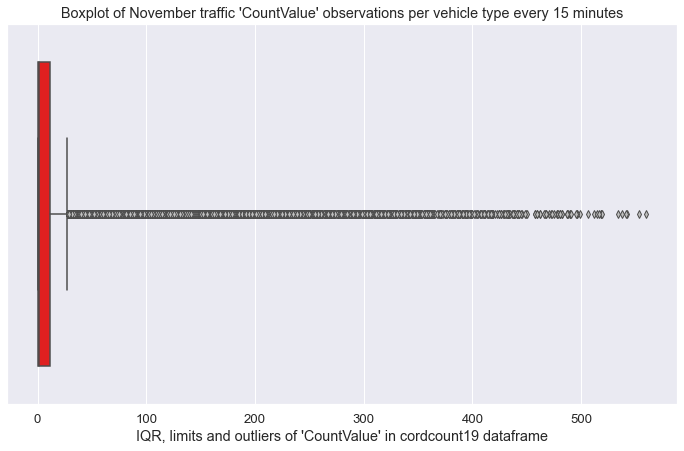

In [42]:
flierprops = dict(markerfacecolor='0.75', markersize=5,
              linestyle='none')
plt.figure(figsize=(12, 7));
sns.set(font_scale = 1.2);
sns.boxplot(x=cordcountnov19["CountValue"], color="red", flierprops=flierprops);
plt.title("Boxplot of November traffic 'CountValue' observations per vehicle type every 15 minutes");
plt.xlabel("IQR, limits and outliers of 'CountValue' in cordcount19 dataframe");

We can zoom in on the IQR and boundaries by zooming in on the x axis.

(0.0, 40.0)

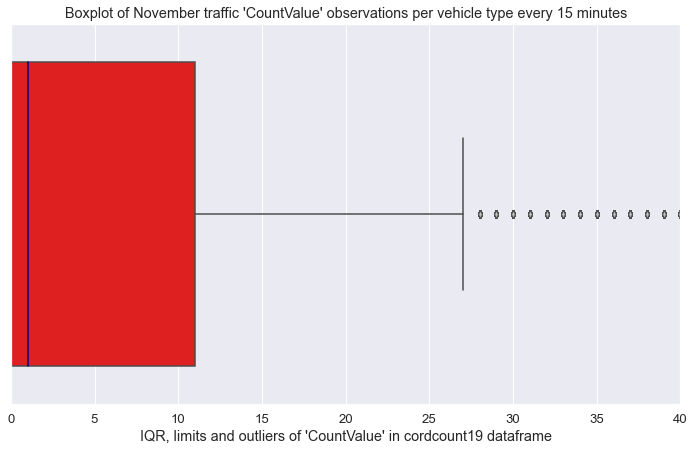

In [43]:
flierprops = dict(markerfacecolor='0.75', markersize=5,
              linestyle='none')
medianprops = dict(color='darkblue')

plt.figure(figsize=(12, 7));
sns.set(font_scale = 1.2);
sns.boxplot(x=cordcountnov19["CountValue"], color="red", flierprops=flierprops,
           medianprops=medianprops);
plt.title("Boxplot of November traffic 'CountValue' observations per vehicle type every 15 minutes");
plt.xlabel("IQR, limits and outliers of 'CountValue' in cordcount19 dataframe");
plt.xlim(0, 40)

Similarly we can view the boxplot on the y-axis instead.

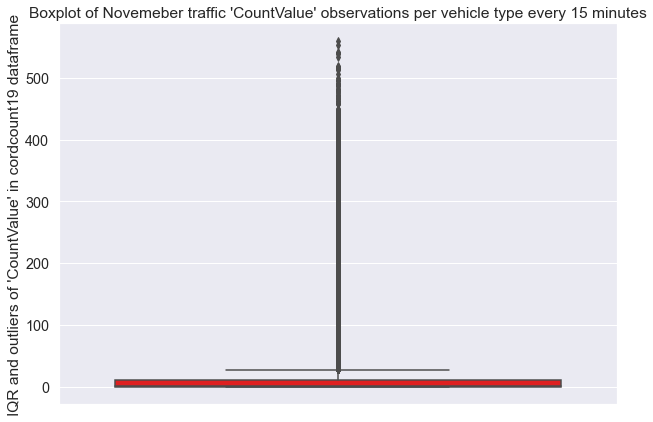

In [44]:
# Same as boxplot one but on y-axis
plt.figure(figsize=(10, 7));
sns.set(font_scale = 1.3);
sns.boxplot(y=cordcountnov19["CountValue"], color="red");
plt.title("Boxplot of Novemeber traffic 'CountValue' observations per vehicle type every 15 minutes");
plt.ylabel("IQR and outliers of 'CountValue' in cordcount19 dataframe");

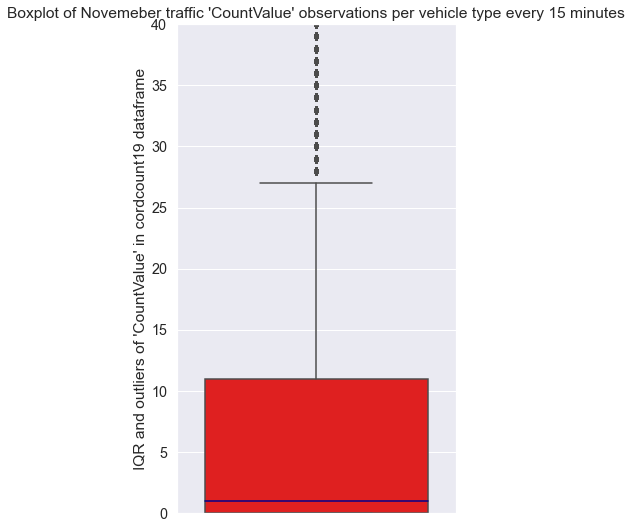

In [45]:
medianprops = dict(color='darkblue')
plt.figure(figsize=(5, 9));
sns.set(font_scale = 1.3);
sns.boxplot(y=cordcountnov19["CountValue"], color="red", medianprops = medianprops);
plt.title("Boxplot of Novemeber traffic 'CountValue' observations per vehicle type every 15 minutes");
plt.ylabel("IQR and outliers of 'CountValue' in cordcount19 dataframe");
plt.ylim(0, 40);

Next we can create a day of the week using pandas date time and then view the boxplot by weekday

In [46]:
DOW_BOX = cordcountnov19
DOW_BOX = funcs.merge_date_time(DOW_BOX)
DOW_BOX = DOW_BOX.reset_index()
DOW_BOX['DayOfWeek'] = DOW_BOX['DateTime'].dt.day_name()

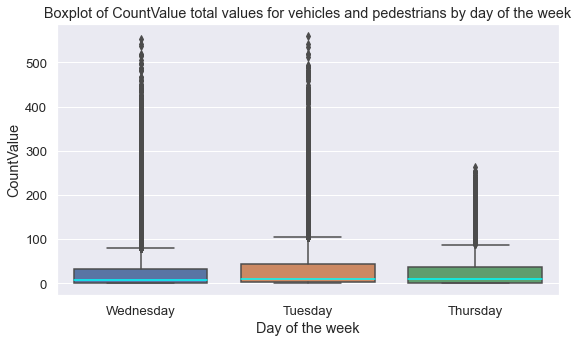

In [47]:
medianprops = dict(color='cyan')

plt.figure(figsize=(9, 5));
sns.set(font_scale = 1.2);
sns.boxplot(x=DOW_BOX["DayOfWeek"], y=DOW_BOX["CountValue"], medianprops = medianprops);
plt.title("Boxplot of CountValue total values for vehicles and pedestrians by day of the week");
plt.xlabel("Day of the week");
plt.ylabel("CountValue");

Finally we can also view the five number summary by date.

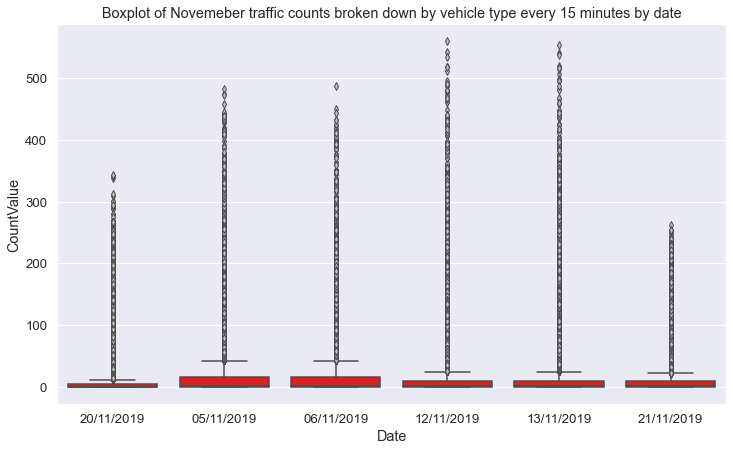

In [48]:
flierprops = dict(markerfacecolor='0.75', markersize=5,
              linestyle='none')

plt.figure(figsize=(12, 7));
sns.set(font_scale = 1.2);
sns.boxplot(x=cordcountnov19["Date"], y=cordcountnov19["CountValue"], color="red",
           flierprops = flierprops);
plt.title("Boxplot of Novemeber traffic counts broken down by vehicle type every 15 minutes by date");
plt.xlabel("Date");
plt.ylabel("CountValue");

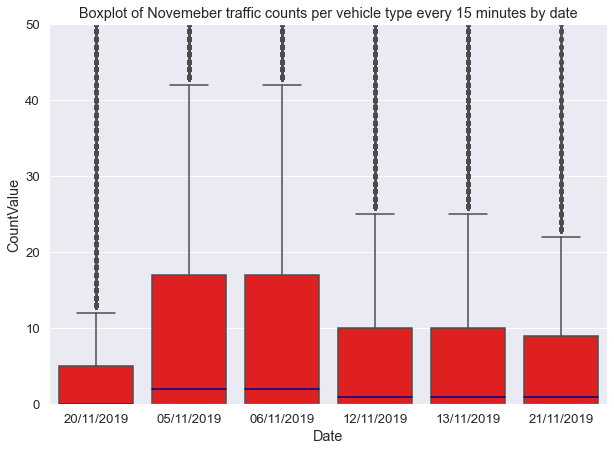

In [49]:
medianprops = dict(color='darkblue')
plt.figure(figsize=(10, 7));
sns.set(font_scale = 1.2);
sns.boxplot(x=cordcountnov19["Date"], y=cordcountnov19["CountValue"], color="red", medianprops=medianprops);
plt.title("Boxplot of Novemeber traffic counts per vehicle type every 15 minutes by date");
plt.xlabel("Date");
plt.ylabel("CountValue");
plt.ylim(0, 50);

In [50]:
cordcountnov19['CountValue'].describe()

count    151390.000000
mean         18.371511
std          44.732526
min           0.000000
25%           0.000000
50%           1.000000
75%          11.000000
max         560.000000
Name: CountValue, dtype: float64

In [51]:
funcs.calculate_IQR_CV(cordcountnov19)

11.0

The boxplots above shows that the interquartile range of the 'CountValue' column in the 'cordcountnov19' datset is 0 at the 1st quartile and 11 at the 3rd quartile. This tells us that 75% of the observations within each 15 minute interval are at or below a value of 11.

However, this is misleading in terms of the IQR of the total traffic counts, as these boxplots are of the datasets observations broken down by 15 minute intervals and by vehicle type. Therefore, this visualisation is not representative of the IQR of the total traffic volume. Additionally, this effect can be seen over each day of the and date week.

If we were to remove outliers based on the below formula on the data in this format, it would introduce bias as the IQR is not taking into account traffic volumes as a total in the aggregate.Instead it is looking at the ranges as they're recorded by CountType category. 

lower boundary = IQR - IQR x 1.5

upper boundary = IQR + IQR x 1.5

Finally, the describe() function and the boxplot show the problem introduced by the sparse data due to the surveyors using zero to describe a null value. This problem is seen persistently for each date of the Novemeber data. For example, 



In [52]:
cordcountnov19.CountType.unique()

array(['HGV 5+X', 'HGV 4X', 'HGV 3X', 'HGV 2X', 'DBUS', 'OBUS', 'LGV',
       'CAR', 'VehTotal', 'PCU', 'P/C', 'TAXI', 'M/C', 'PED', 'CAR OCC 4',
       'CAR OCC 5', 'CAR OCC 6', 'CAR OCC 7', 'CAR OCC 8', 'CAR OCC 9',
       'CAR OCC 3', 'TAXI OCC 4', 'TAXI OCC 5', 'TAXI OCC 6',
       'TAXI OCC 7', 'TAXI OCC 8', 'TAXI OCC 9', 'TAXI OCC 3',
       'TAXI OCC 2', 'TAXI OCC 1', 'CAR OCC 2', 'CAR OCC 1', 'PEDTOTAL',
       'ADULT', 'ELDERLY', 'CHILD'], dtype=object)

### Distribution of the raw data 

The issue caused by the introduction of the additional sparse data due to CountValues being recorded by vehicle type 'CountType' can be easily visualised using Dist and Bar plots

C:\Users\shaun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


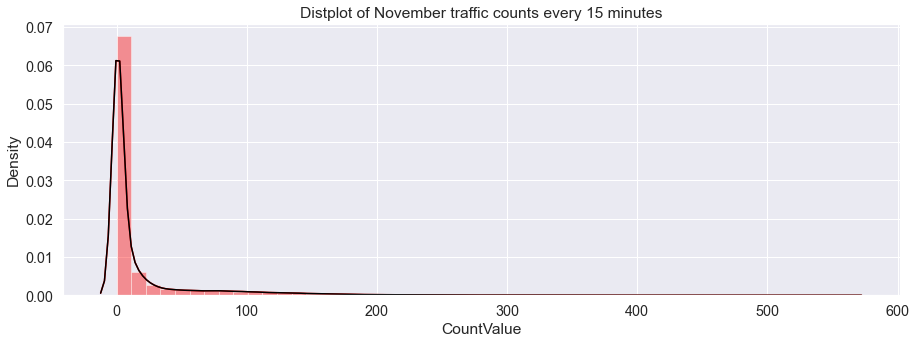

In [53]:
cordcountnov19 = pd.read_csv("cordon-count-november-2019.csv", low_memory=False)
# I had to reimport the data here due to a memory issue with this plot

plt.figure(figsize=(15, 5));
sns.set(font_scale = 1.3);
sns.distplot(cordcountnov19.CountValue, color = "red",);
sns.kdeplot(cordcountnov19.CountValue, color="black")
plt.title("Distplot of November traffic counts every 15 minutes");
plt.xlabel("CountValue");

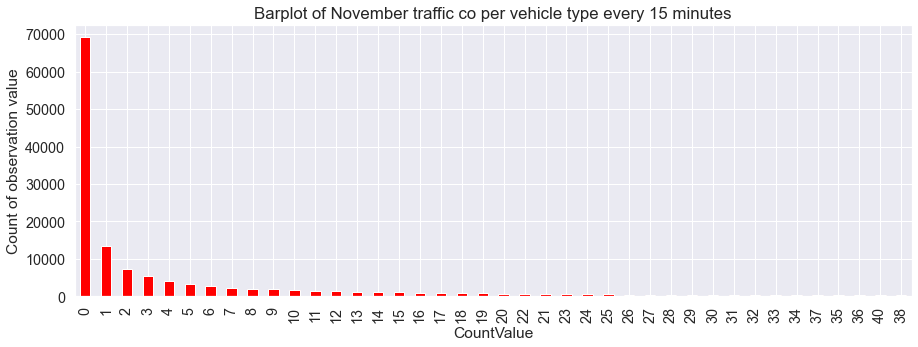

In [54]:
cordcountnov19.CountValue.value_counts().nlargest(40).plot(kind="bar", figsize=(15,5), color="red");
sns.set(font_scale = 1.4);
plt.title("Barplot of November traffic co per vehicle type every 15 minutes")
plt.ylabel("Count of observation value");
plt.xlabel("CountValue");

# Used nlargest of 40 as it captures most of the higher counts

The above dist and bar plots demonstrate that in the vast majority of observations, the 'CountValue' for the traffic have a value of Zero. As the purpose of this survey was to count traffic, the breakdown of CountValue by vehicle type intrinsically makes sense. However, the use of "Zero" for non observed traffic types when it really means a null value is problematic for visualisation for viewing our IQR as it impacts on the distribution of our data.

The histogram (distplot) show that the distribution of values in the cordcountnov19 is not a normal distribution. The distribution type is discrete, specifically it is a 'Poisson' distribution. As the 'CountValues' are counts of the number of vehicles by vehicle category (e.g truck, car) in a specific locations (SiteNumber) during specific time periods (Date and Time).

The  EDA on the November dataset has highlighted that in order to get meaningful analysis of our traffic counts over time, we will need to look at the totals of the vehicle counts as an aggregate over the specified time period as opposed to by individual vehicle category.

In addition, the spare data will need to be removed as it is introducing bias into our dataset and the Zero's for 'CountValue' are in fact "null" values.  This highlights that a value of Zero is outside the 'Domain' of our dataset.

### Impact of null values on CountValues by vehicle type

In order to visualise the impact of multiple categories on our datas IQR we can visualisee using bar charts

(0.0, 10000.0)

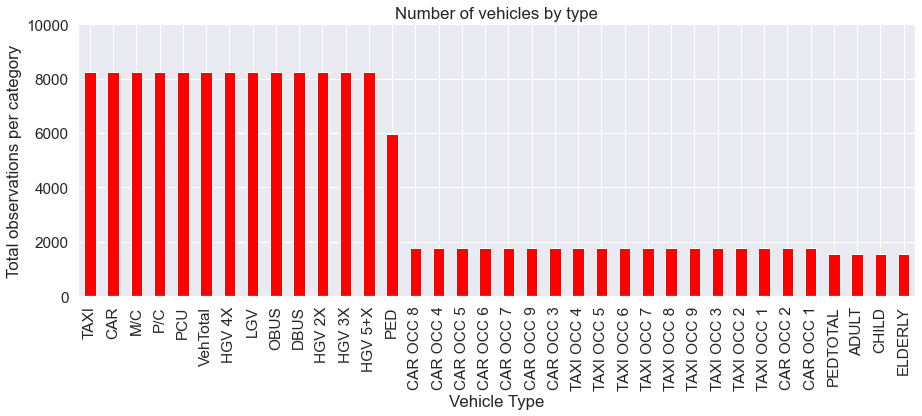

In [55]:
cordcountnov19.CountType.value_counts().nlargest(40).plot(kind="bar", 
figsize=(15,5), color="red")
plt.title("Number of vehicles by type")
plt.ylabel("Total observations per category")
plt.xlabel("Vehicle Type");
plt.ylim(0., 10000) 

The above bar plot helps us to visualise how the traffic observations are broken down by category. Due to the large number of vehicle categories for which counts were taken, this has split the CountValue for traffic into multiple sub categories. This has impacted our IQR as the IQR is expressing the most observed CountValues broken down over multiple different vehicle categories within a 15 minute time period.

We can get a truer indication of the number of observations by category if we merge those of similar types, for example trucks, buses, taxis, pedestrians and cars.

In [56]:
merged = pd.read_csv("cordon-count-november-2019.csv", low_memory=False)
merged = funcs.merge_similar_counttypes(merged)

(0.0, 45000.0)

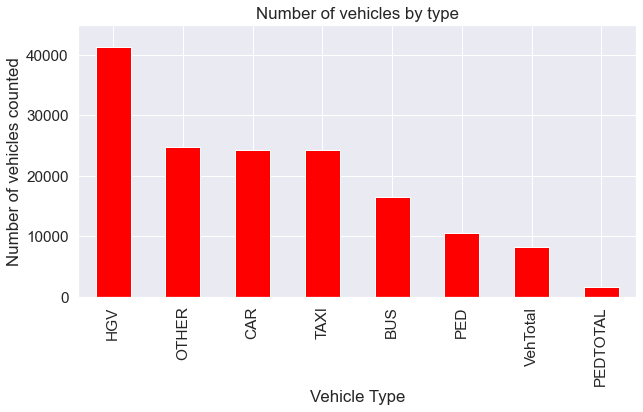

In [57]:
merged.CountType.value_counts().nlargest(40).plot(kind="bar",
figsize=(10,5), color="red")
plt.title("Number of vehicles by type")
plt.ylabel("Number of vehicles counted")
plt.xlabel("Vehicle Type");
plt.ylim(0, 45000) 

However the above is misleading as it is the total number of observations by category and not maximum number of vehicles. In addition, the Zero's in CountValue are adding to the "total" number of observations for each category type.

Therefore it we remove the zeros and replot the same bar plots as above

In [58]:
NoZero19 = cordcountnov19.loc[(cordcountnov19['CountValue'] > 0)]

(0.0, 10000.0)

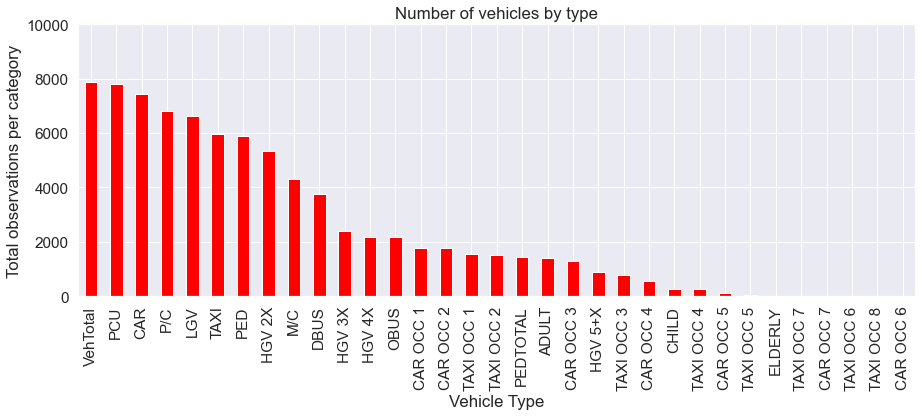

In [59]:
NoZero19.CountType.value_counts().nlargest(40).plot(kind="bar", 
figsize=(15,5), color="red")
plt.title("Number of vehicles by type")
plt.ylabel("Total observations per category")
plt.xlabel("Vehicle Type");
plt.ylim(0, 10000) 

Now with the zeros removed, you can see a large number of the HGV observations have been removed and that 'VehTotal' is now the most common observation with no null values among the multiple categories. However, the data is still disaggregated due to the large number of categories. For example, "Car OCC 1 stands for Car Occupants = 1" and OCC = Occupants = 2 etc. We can get a better understanding of the traffic counts if we aggregate the data by similar vehicle categoreis. For example, merge all trucks as one new category, same with cars, taxis and buses etc. 


In [60]:
NoZero19 = funcs.merge_similar_counttypes(NoZero19)

(0.0, 20000.0)

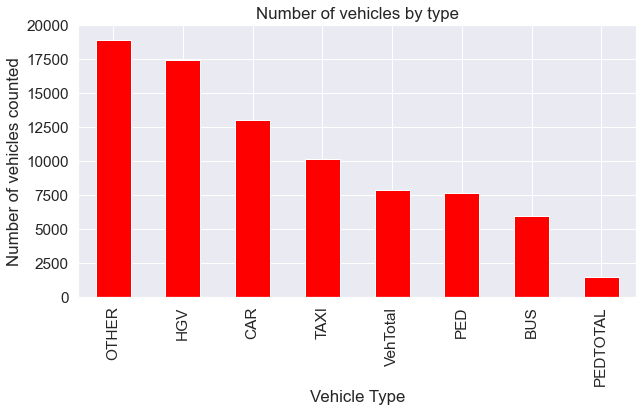

In [61]:
NoZero19.CountType.value_counts().nlargest(40).plot(kind="bar",
figsize=(10,5), color="red")
plt.title("Number of vehicles by type")
plt.ylabel("Number of vehicles counted")
plt.xlabel("Vehicle Type");
plt.ylim(0, 20000) 

### Analysis of traffic counts total over time

In order to visulaise the 'real' numbers of traffic over time, we need to do some data manipulation in order to view the traffic totals from the rest of the dataset. In addition we need to filter out the zero values and merge the 'CountType' vehicle categories that are of a similar type.

In addition, as the time intervals of 15 minutes will make the x-axis of a visualisation difficult to read, we can use pandas "datetime" to view the traffic totals by hour, day or weekdate.

Below I merge the "Date" and "Time" columns to create a new "DateTime" column which is then set as the datasets index.

In [62]:
Time_df = pd.read_csv("cordon-count-november-2019.csv", low_memory=False)
Time_df = Time_df.loc[Time_df['CountValue'] > 0]
Time_df = funcs.merge_date_time(Time_df) # Creating the new index

In [63]:
Time_df.index

DatetimeIndex(['2019-11-20 07:15:00', '2019-11-20 07:15:00',
               '2019-11-20 07:15:00', '2019-11-20 07:30:00',
               '2019-11-20 07:30:00', '2019-11-20 07:45:00',
               '2019-11-20 07:45:00', '2019-11-20 08:00:00',
               '2019-11-20 08:00:00', '2019-11-20 08:15:00',
               ...
               '2019-11-20 16:30:00', '2019-11-20 16:45:00',
               '2019-11-20 17:00:00', '2019-11-20 17:15:00',
               '2019-11-20 17:30:00', '2019-11-20 17:45:00',
               '2019-11-20 18:00:00', '2019-11-20 18:15:00',
               '2019-11-20 18:30:00', '2019-11-20 18:45:00'],
              dtype='datetime64[ns]', name='DateTime', length=82251, freq=None)

In [64]:
Time_df = funcs.convert_to_date_time(Time_df)

Next I separate out the aggregated vehicle and pedestrian totals from the rest of the vehicle categories in the "CountType" column. In addition, I remove the sparse data by filtering out any vehicle total that is Zero.

In [65]:
total_veh_df = Time_df.loc[(Time_df['CountType'] == "VehTotal") & (Time_df['CountValue'] > 0)]
total_ped_df = Time_df.loc[(Time_df['CountType'] == "PEDTOTAL") & (Time_df['CountValue'] > 0)]

# Creation of a total vehicles and total ped dataframes

In [66]:
total_ped_veh_df = Time_df.loc[(Time_df['CountType'] == "PEDTOTAL")| 
                                      (Time_df['CountType'] == "VehTotal")]
total_ped_veh_df = Time_df[(Time_df['CountValue'] > 0)]

# Creation of a dataframe containing both vehicles and pedestrians totals

We can now view the five umber summary for the aggregated totals for pedestrian and vehicle counts using describe below

In [67]:
total_ped_veh_df.describe()


,RecordID,CountValue
count,82251.000000,82251.000000
mean,535639.611020,33.814337
std,69744.113602,56.221302
min,373049.000000,1.000000
25%,534340.500000,2.000000
50%,556695.000000,9.000000
75%,577257.500000,38.000000
max,637839.000000,560.000000


In [68]:
funcs.show_boundaries(total_ped_veh_df)

The first quartile (Q1) is 2.0
The third quartile (Q3) is 38.0
The upper boundary for outliers is is 92.0
The lower boundary for outliers is is 1


Now we can investigate vehicle totals over time

In [69]:
vehbyhour = total_veh_df.resample('H').sum()
vehbyhour = vehbyhour[(vehbyhour['CountValue'] > 0)]

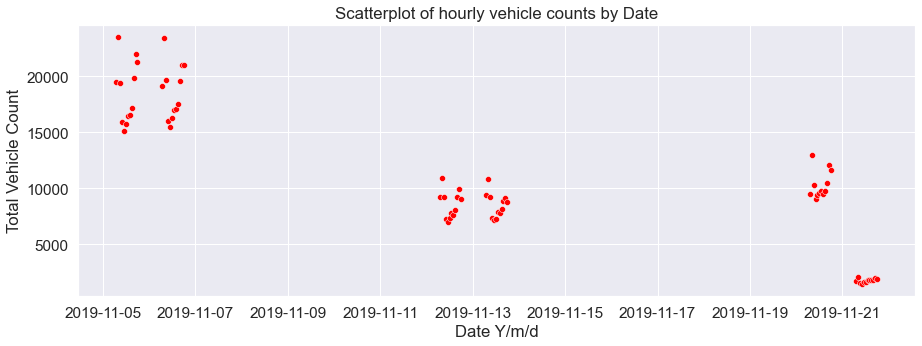

In [70]:
plt.figure(figsize=(15, 5));
vt = sns.scatterplot(data = vehbyhour, x = "DateTime", y = "CountValue", color="red")
vt = vt.set_ylim();
plt.title("Scatterplot of hourly vehicle counts by Date");
plt.xlabel("Date Y/m/d");
plt.ylabel("Total Vehicle Count");

The above scatterplot shows that the total vehicle counts differed vastly by the hour across different dates.

Next we can look at Vehicle totals by hour and day of the tmonth

In [71]:
Hour_df = pd.read_csv("cordon-count-november-2019.csv", low_memory=False)
Hour_df = Hour_df.loc[Hour_df['CountValue'] > 0]
Hour_df = funcs.merge_date_time(Hour_df) # Creating the new index
Hour_df = Hour_df.loc[(Hour_df['CountType'] == "VehTotal")]
Hour_df = Hour_df[(Hour_df['CountValue'] > 0)]
Hour_df = Hour_df.resample('H').sum()
Hour_df = Hour_df[(Hour_df['CountValue'] > 0)]
Hour_df = Hour_df.reset_index()
Hour_df['Hour'] = Hour_df['DateTime'].dt.hour
Hour_df['Day'] = Hour_df['DateTime'].dt.day
Hour_df['DayOfWeek'] = Hour_df['DateTime'].dt.day_name()

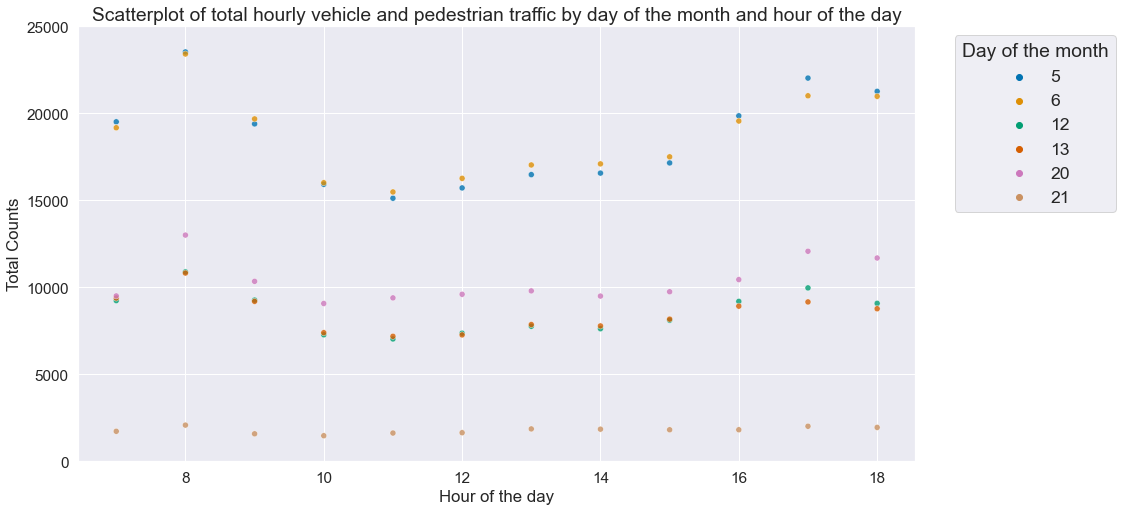

In [72]:
sns.set_palette('colorblind')# Plot
fig, ax = plt.subplots(figsize=(15,8))
sns.set(font_scale = 1.6);
vt = sns.scatterplot(data = Hour_df, x = "Hour", y = "CountValue", hue="Day", 
                     palette=sns.color_palette("colorblind", n_colors=6), alpha=0.8)
vt = ax.set_ylim(0, 25000);
plt.title("Scatterplot of total hourly vehicle and pedestrian traffic by day of the month and hour of the day");
ax.set_xlabel("Hour of the day")
ax.set_ylabel("Total Counts");
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title="Day of the month");

The above plot shows substantial differences in total vehicle traffic by Day of the month, one day in particular has much longer traffic compare to the other 4 days, we can view this traffic by day of the week to try and identify which day this is.

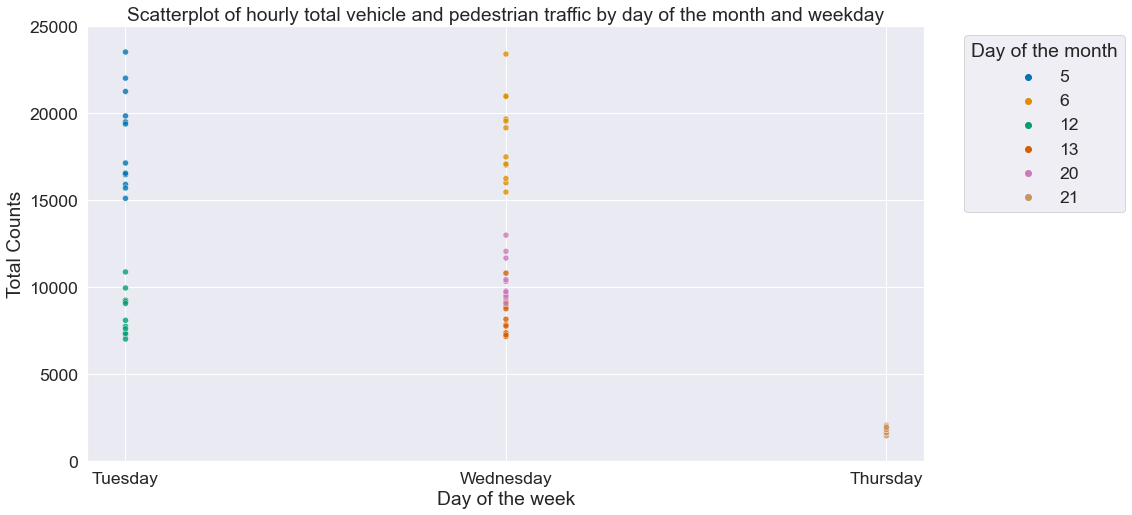

In [73]:
sns.set_palette('colorblind')# Plot
fig, ax = plt.subplots(figsize=(15,8))
sns.set(font_scale = 1.6);
vt = sns.scatterplot(data = Hour_df, x = "DayOfWeek", y = "CountValue", hue="Day", 
                     palette=sns.color_palette("colorblind", n_colors=6), alpha=0.8)
vt = ax.set_ylim(0, 25000);
plt.title("Scatterplot of hourly total vehicle and pedestrian traffic by day of the month and weekday");
ax.set_xlabel("Day of the week")
ax.set_ylabel("Total Counts");
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title="Day of the month");

Here we can see that Thursdays total vehicle traffic is much lower than Tuesday or Wednesday. Tues and Wednesday range between approx 7,000 to 23,000 while Thursday are approx 2,000 to 2,500. We can also see that Two seperate Wednesdays and Tuesdays were sampled whereas only a single Thursday was sampled.

We can visualise the summary statistics of the vehicle and pedestrians totals each day using boxplots

### Boxplot of pedestrian and vehicle traffic totals by day of the week

In order to view the summary statistics of the total traffic by each 15 minute interval we must view the data by the aggregated pedestrian and vehicle totals with the sparse data removed.

We can boxplot the range and outliers of the CountValue column by Date and Vehicle or Pedestrian total as follows

In [74]:
box_df = pd.read_csv("cordon-count-november-2019.csv", low_memory=False)
box_df = box_df.loc[(box_df['CountType'] == "PEDTOTAL")| 
                                      (box_df['CountType'] == "VehTotal")]
box_df = box_df[(box_df['CountValue'] > 0)]
box_df = funcs.merge_date_time(box_df)
box_df = box_df.reset_index()

In [75]:
box_df.describe()

,RecordID,CountValue
count,9299.000000,9299.000000
mean,530530.568556,87.850844
std,80563.453048,82.785915
min,373050.000000,1.000000
25%,534702.000000,19.000000
50%,558109.000000,73.000000
75%,586460.000000,130.000000
max,601024.000000,560.000000


In [76]:
funcs.show_boundaries(box_df)

The first quartile (Q1) is 19.0
The third quartile (Q3) is 130.0
The upper boundary for outliers is is 296.5
The lower boundary for outliers is is 1


Here we see that by viewing the data by the Vehicle and Pedestrian totals as oppossed to via the breakdown of categories found in counttype, then the IQR and outlier boundaries move significantly. This shows if the outliers were removed based on the observations by individual category, much data would be removed as outliers that are not really outliers of total traffic. The original summary statistics only showed what was an outlier when counts were broken down by category. Here the upper boundary for the "total" traffic is 296.5 whereas when broken in the raw data summarised without aggregation the upper boundary was 27.5.

We can visualise the IQR and outliers of the total traffic by "Date" below. 

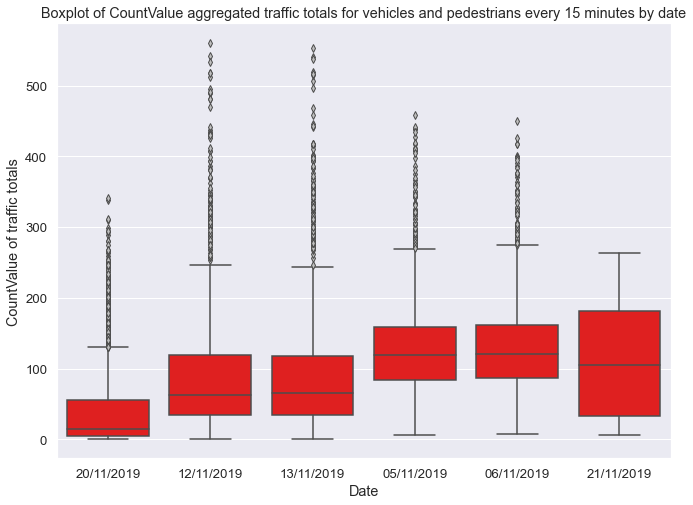

In [77]:
flierprops = dict(markerfacecolor='0.75', markersize=5,
              linestyle='none')
plt.figure(figsize=(11, 8));
sns.set(font_scale = 1.2);
sns.boxplot(x=box_df["Date"], y=box_df["CountValue"], color="red",
           flierprops = flierprops);
plt.title("Boxplot of CountValue aggregated traffic totals for vehicles and pedestrians every 15 minutes by date");
plt.xlabel("Date");
plt.ylabel("CountValue of traffic totals");

In [78]:
box_df['DayOfWeek'] = box_df['DateTime'].dt.day_name()

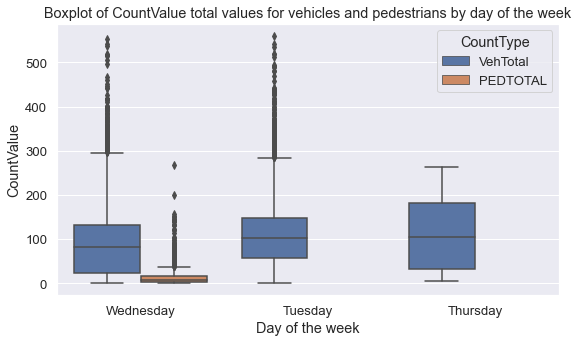

In [79]:
plt.figure(figsize=(9, 5));
sns.set(font_scale = 1.2);
sns.boxplot(x=box_df["DayOfWeek"], y=box_df["CountValue"], hue=box_df["CountType"]);
plt.title("Boxplot of CountValue total values for vehicles and pedestrians by day of the week");
plt.xlabel("Day of the week");
plt.ylabel("CountValue");

The above code block shows pedestrian totals were only counted for a single day of the week. This means we only have one day worth of data to predict pedestrian traffic for the November dataset.

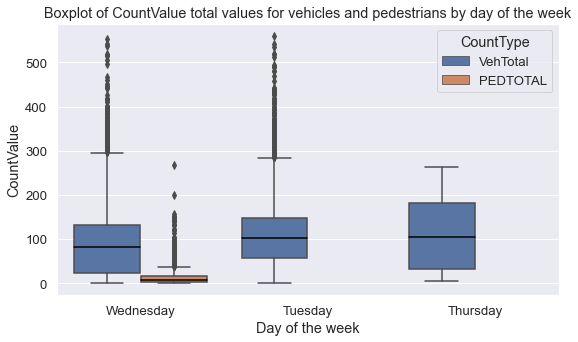

In [80]:
medianprops = dict(color='black')

plt.figure(figsize=(9, 5));
sns.set(font_scale = 1.2);
sns.boxplot(x=box_df["DayOfWeek"], y=box_df["CountValue"], hue=box_df["CountType"],
            medianprops = medianprops);
plt.title("Boxplot of CountValue total values for vehicles and pedestrians by day of the week");
plt.xlabel("Day of the week");
plt.ylabel("CountValue");

In [81]:
box_df2 = box_df.loc[(box_df['CountType'] == "VehTotal")]

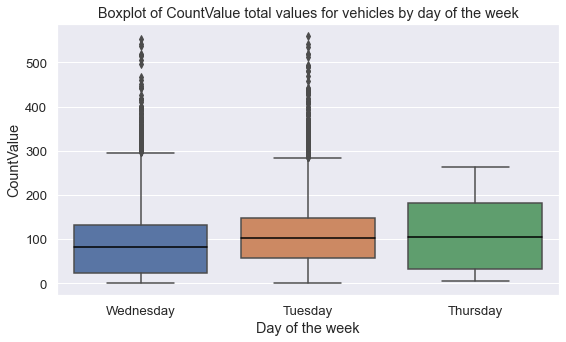

In [82]:
medianprops = dict(color='black')

plt.figure(figsize=(9, 5));
sns.set(font_scale = 1.2);
sns.boxplot(x=box_df2["DayOfWeek"], y=box_df["CountValue"], medianprops = medianprops);
plt.title("Boxplot of CountValue total values for vehicles by day of the week");
plt.xlabel("Day of the week");
plt.ylabel("CountValue");

In [83]:
box_df2.describe()
#Boxplot of Vehicles total countvalues excluding sparse data

,RecordID,CountValue
count,7876.000000,7876.000000
mean,517922.594972,101.037075
std,81390.104667,82.847764
min,373050.000000,1.000000
25%,531319.750000,34.000000
50%,551400.000000,91.000000
75%,575827.250000,139.000000
max,595896.000000,560.000000


### Distribution of total traffic counts

Next we can visualise the distribution of the aggregated totals in the dataframe usng dist, bar and QQplots

In [84]:
dist_df = pd.read_csv("cordon-count-november-2019.csv", low_memory=False)
dist_df = dist_df.loc[(dist_df['CountType'] == "PEDTOTAL")| 
                                      (dist_df['CountType'] == "VehTotal")]
dist_df = dist_df[(dist_df['CountValue'] > 0)]

dist_df.describe()

,RecordID,CountValue
count,9299.000000,9299.000000
mean,530530.568556,87.850844
std,80563.453048,82.785915
min,373050.000000,1.000000
25%,534702.000000,19.000000
50%,558109.000000,73.000000
75%,586460.000000,130.000000
max,601024.000000,560.000000


C:\Users\shaun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


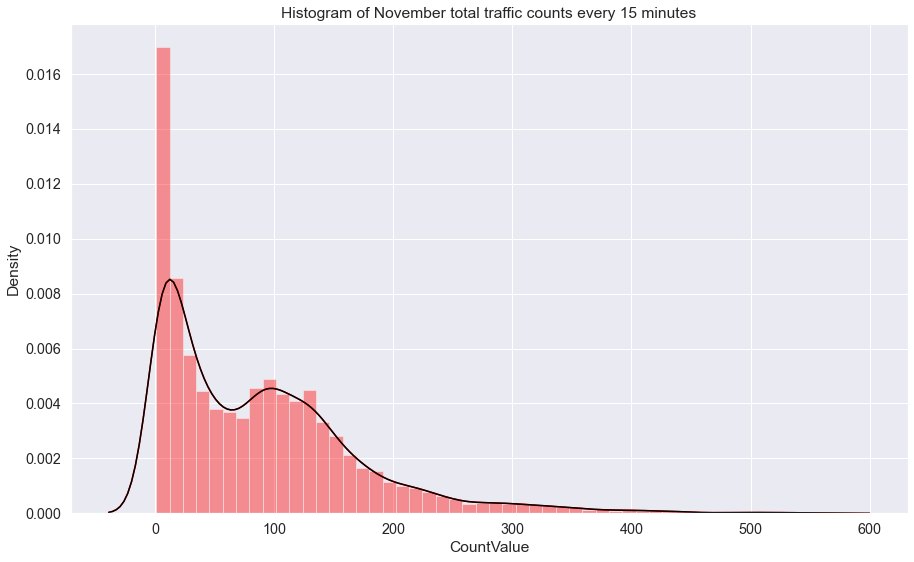

In [85]:
plt.figure(figsize=(15, 9));
sns.set(font_scale = 1.3);
sns.distplot(dist_df.CountValue, color = "red",);
sns.kdeplot(dist_df.CountValue, color="black")
plt.title("Histogram of November total traffic counts every 15 minutes");
plt.xlabel("CountValue");

The histogram of the total traffic counts show that the distribution type is discrete, specifically it is a 'Poisson' distribution. As the 'CountValue' are counts of the number of vehicles by vehicle category (e.g truck, car) which cannot be limited to a particular value at a specific location during a specific time period (Date and Time). As these are traffic counts, there is no limit to the potential domain.

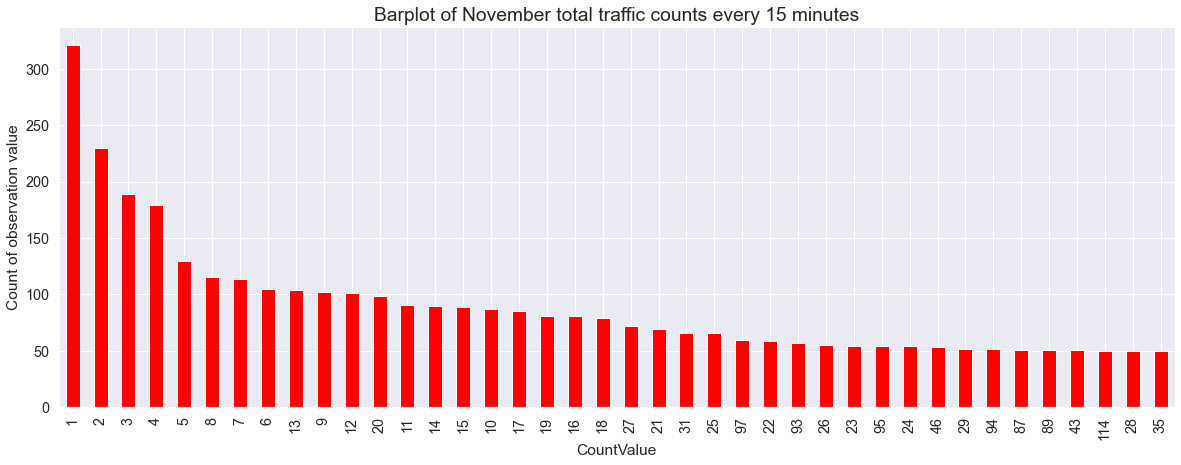

In [86]:
dist_df.CountValue.value_counts().nlargest(40).plot(kind="bar", figsize=(20,7), color="red");
sns.set(font_scale = 1.6);
plt.title("Barplot of November total traffic counts every 15 minutes");
plt.ylabel("Count of observation value");
plt.xlabel("CountValue");

The bar plot can be used to demonstrate similar but is less suitable as nlargest would need to go over 200 to accurately represent most of the data. The hist plot more accurately shows the shape of the distribution and is more appropriate for visualisation.

C:\Users\shaun\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


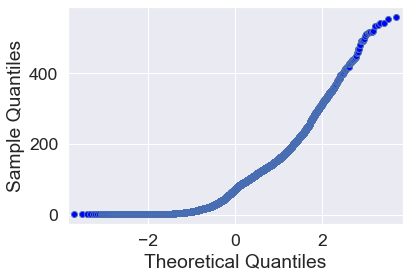

In [87]:
my_data = dist_df.CountValue
sm.qqplot(my_data)
pylab.show()

# using no reference line

In [88]:
ks_statistic, p_value = kstest(my_data, 'norm')
print(ks_statistic, p_value)

0.9427300272087193 0.0


The QQ plot shows that the distribution is a poison and this is confirmed using the KS test where the K statistic has a p = 0 so the deviation is significant. 


### Using a normal distribution to calculate the probability of a traffic event in the November dataset

First we subset our data equal to give total traffic volumes for vehicles per hour for a single day

In [89]:
norm_df = cordcountnov19.loc[(cordcountnov19['CountType'] == "VehTotal")]
norm_df = cordcountnov19.loc[(cordcountnov19['Date'] == "20/11/2019")]
norm_df = norm_df[(norm_df['CountValue'] > 0)]

In [90]:
print(norm_df.Date.unique())
no_of_days = 1
print(f"The no. of unique days is {no_of_days}")

['20/11/2019']
The no. of unique days is 1


Next we calculate the mean hourly traffic total

In [91]:
norm_df.describe()

,RecordID,CountValue
count,18017.000000,18017.000000
mean,443422.977410,23.683466
std,99169.388733,41.380699
min,373049.000000,1.000000
25%,377553.000000,2.000000
50%,382057.000000,6.000000
75%,541766.000000,21.000000
max,637839.000000,344.000000


The mean (average) total traffic count value per hour is 41.38 on the 20/11/2019

Therefore using the probability app, we can calculate the probability of the total hour traffic count mean being 50 or any other value per hour. See assignment document.

## Impact of Removing sparse data from 'CountValue' label

Next we can examine the impact of removing the sparse data from our raw November data

In [92]:
new_df = funcs.remove_zeros_cv(cordcountnov19)

In [93]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82251 entries, 69139 to 151389
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RecordID       82251 non-null  int64 
 1   CountGroup     82251 non-null  object
 2   SiteNumber     82251 non-null  object
 3   Direction      12556 non-null  object
 4   Movement       82251 non-null  object
 5   ArmFrom        12556 non-null  object
 6   ArmTo          12556 non-null  object
 7   DirectionFrom  80654 non-null  object
 8   DirectionTo    80654 non-null  object
 9   Date           82251 non-null  object
 10  Time           82251 non-null  object
 11  CountType      82251 non-null  object
 12  CountValue     82251 non-null  int64 
 13  ArmCrossed     3129 non-null   object
 14  ArmLocation    3129 non-null   object
dtypes: int64(2), object(13)
memory usage: 10.0+ MB


In [94]:
new_df.head(2)

,RecordID,CountGroup,SiteNumber,Direction,Movement,ArmFrom,ArmTo,DirectionFrom,DirectionTo,Date,Time,CountType,CountValue,ArmCrossed,ArmLocation
69139,373049,JTC,3424-IRE-Nov2019-011-JTC,A to D - Dolphin's Barn to Parnell Road,1,A,D,N,E,20/11/2019,07:15:00,CAR,2,NaN,NaN
69140,373050,JTC,3424-IRE-Nov2019-011-JTC,A to D - Dolphin's Barn to Parnell Road,1,A,D,N,E,20/11/2019,07:15:00,VehTotal,3,NaN,NaN


By removing the sparse data we see that 69,140 Zero count values have been removed leaving 82250 remaining + the header column for 82251 total.This demonstrates that 45.67% of the original 151,390 observations were Sparse data introduced by the CountType categories. We can now review the five-number summary after the sparse data has been removed using box and bar plots

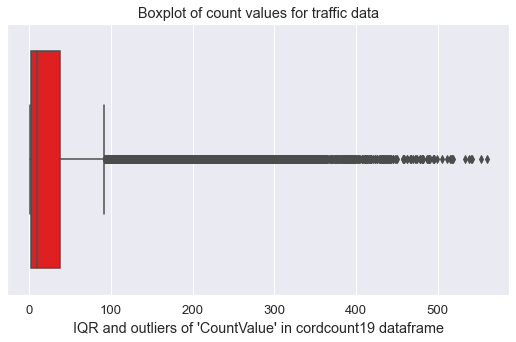

In [95]:
plt.figure(figsize=(9, 5));
sns.set(font_scale = 1.2);
sns.boxplot(x=new_df["CountValue"], color="red");
plt.title("Boxplot of count values for traffic data");
plt.xlabel("IQR and outliers of 'CountValue' in cordcount19 dataframe");

In [96]:
new_df.describe()

,RecordID,CountValue
count,82251.000000,82251.000000
mean,535639.611020,33.814337
std,69744.113602,56.221302
min,373049.000000,1.000000
25%,534340.500000,2.000000
50%,556695.000000,9.000000
75%,577257.500000,38.000000
max,637839.000000,560.000000


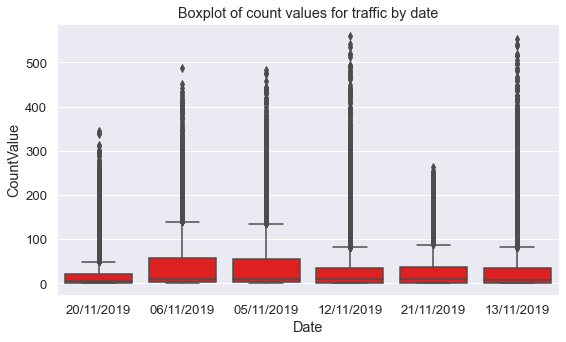

In [97]:
plt.figure(figsize=(9, 5));
sns.set(font_scale = 1.2);
sns.boxplot(x=new_df["Date"], y=new_df["CountValue"], color="red");
plt.title("Boxplot of count values for traffic by date");
plt.xlabel("Date");
plt.ylabel("CountValue");

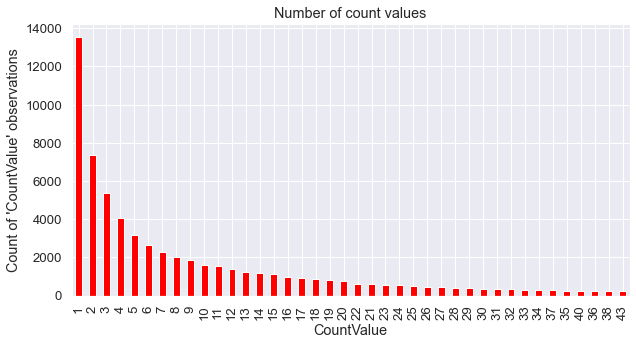

In [98]:
plt.figure(figsize=(9, 5));
new_df.CountValue.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5), color="red")
plt.title("Number of count values");
plt.ylabel("Count of 'CountValue' observations")
plt.xlabel("CountValue");

In [99]:
new_dfIQR = funcs.calculate_IQR_CV(new_df)

In [100]:
print(f"The above shows that removing the sparse data has shifted the IQR to {new_dfIQR}")

The above shows that removing the sparse data has shifted the IQR to 36.0


## Identifying missing categorical data

In [101]:
cordcountnov19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151390 entries, 0 to 151389
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   RecordID       151390 non-null  int64 
 1   CountGroup     151390 non-null  object
 2   SiteNumber     151390 non-null  object
 3   Direction      29952 non-null   object
 4   Movement       151390 non-null  object
 5   ArmFrom        29952 non-null   object
 6   ArmTo          29952 non-null   object
 7   DirectionFrom  147838 non-null  object
 8   DirectionTo    147838 non-null  object
 9   Date           151390 non-null  object
 10  Time           151390 non-null  object
 11  CountType      151390 non-null  object
 12  CountValue     151390 non-null  int64 
 13  ArmCrossed     6143 non-null    object
 14  ArmLocation    6143 non-null    object
dtypes: int64(2), object(13)
memory usage: 17.3+ MB


In [102]:
cordcountnov19.isnull().sum()

RecordID              0
CountGroup            0
SiteNumber            0
Direction        121438
Movement              0
ArmFrom          121438
ArmTo            121438
DirectionFrom      3552
DirectionTo        3552
Date                  0
Time                  0
CountType             0
CountValue            0
ArmCrossed       145247
ArmLocation      145247
dtype: int64

We can calculate the missing data as a % of the total number of observations

In [103]:
funcs.calc_percent_missing(cordcountnov19.isnull().sum(), len(cordcountnov19))

The percentage of missing values is:
RecordID          0.00
CountGroup        0.00
SiteNumber        0.00
Direction        80.22
Movement          0.00
ArmFrom          80.22
ArmTo            80.22
DirectionFrom     2.35
DirectionTo       2.35
Date              0.00
Time              0.00
CountType         0.00
CountValue        0.00
ArmCrossed       95.94
ArmLocation      95.94
dtype: float64


The Percentage of missing values in "ArmFrom", "ArmTo" and Direction columns is 80.22%

The Percentage of missing values in "Direction From" and "Direction To" columns is 2.35%

The Percentage of missing values in "ArmCrossed and "ArmLocation" columns is 95.94%

Next lets observe the impact of the sparse data removal on the missing categoricals in the November dataset:

In [104]:
cleaned_df = funcs.remove_zeros_cv(cordcountnov19)

In [105]:
cleaned_df.isnull().sum()

RecordID             0
CountGroup           0
SiteNumber           0
Direction        69695
Movement             0
ArmFrom          69695
ArmTo            69695
DirectionFrom     1597
DirectionTo       1597
Date                 0
Time                 0
CountType            0
CountValue           0
ArmCrossed       79122
ArmLocation      79122
dtype: int64

In [106]:
funcs.calc_percent_missing(cleaned_df.isnull().sum(), len(cleaned_df))

The percentage of missing values is:
RecordID          0.00
CountGroup        0.00
SiteNumber        0.00
Direction        84.73
Movement          0.00
ArmFrom          84.73
ArmTo            84.73
DirectionFrom     1.94
DirectionTo       1.94
Date              0.00
Time              0.00
CountType         0.00
CountValue        0.00
ArmCrossed       96.20
ArmLocation      96.20
dtype: float64


In [107]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82251 entries, 69139 to 151389
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RecordID       82251 non-null  int64 
 1   CountGroup     82251 non-null  object
 2   SiteNumber     82251 non-null  object
 3   Direction      12556 non-null  object
 4   Movement       82251 non-null  object
 5   ArmFrom        12556 non-null  object
 6   ArmTo          12556 non-null  object
 7   DirectionFrom  80654 non-null  object
 8   DirectionTo    80654 non-null  object
 9   Date           82251 non-null  object
 10  Time           82251 non-null  object
 11  CountType      82251 non-null  object
 12  CountValue     82251 non-null  int64 
 13  ArmCrossed     3129 non-null   object
 14  ArmLocation    3129 non-null   object
dtypes: int64(2), object(13)
memory usage: 10.0+ MB


The Percentage of missing values in "ArmFrom", "ArmTo" and "Direction" columns after the removal of the additional sparse data is 84.73%

The Percentage of missing values in "Direction From" and "Direction To" columns after the removal of the additional sparse data is 1.94%

The Percentage of missing values in "ArmCrossed and "ArmLocation" columns after the removal of the additional sparse data is 96.2%

Therefore, for machine learning we can conclude it is best to drop the "ArmFrom", "ArmTo", "Direction", "ArmCrossed" and "ArmLocation" as 80.22 to 95.94 of this data is missing. Furthermore, even after the additional sparse data is removed from the dataset, this still results in the missing data for 84.73-96.2% in these columns.

Given the amount of missing data, it would introduce more bias to replace these missing values using either the mean, median or mode, or K-nearest neighbor than to just remove them. In addition, as such a large proportion of the data is missing, you could not accurately use a Bayesian approach to calculate the nearest value. This issue is further compounded by the fact the data is missing 'at random'.


In the case of the "Direction From" and "Direction To" colulmns, as the missing data is 2.35% before and 1.94% after the removal of the additional sparse data. These missing values could easily be replaced by the "mode". The data in these columns is also only missing from a specific site location and is not missing at random.

Therefore, we need to calculate the "frequency" of observations for the categories in "DirectionFrom" and DirectionTo" columns.

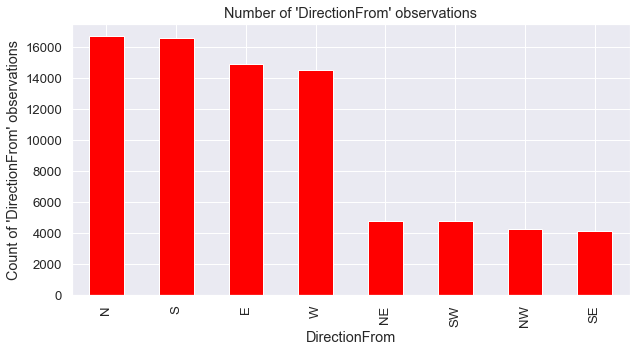

In [108]:
plt.figure(figsize=(9, 5));
new_df.DirectionFrom.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5), color="red")
plt.title("Number of 'DirectionFrom' observations");
plt.ylabel("Count of 'DirectionFrom' observations")
plt.xlabel("DirectionFrom");

"North" is the mode of the "DirectionFrom" values

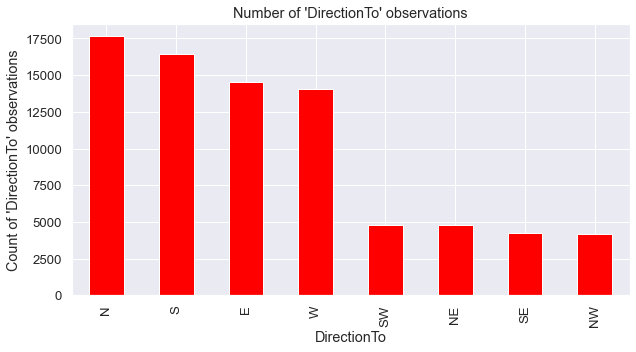

In [109]:
plt.figure(figsize=(9, 5));
new_df.DirectionTo.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5), color="red")
plt.title("Number of 'DirectionTo' observations");
plt.ylabel("Count of 'DirectionTo' observations")
plt.xlabel("DirectionTo");

"North" is the mode of the "DirectionTo" values

In [110]:
print(cordcountnov19.ArmFrom.unique())
print(cordcountnov19.ArmTo.unique())
print(cordcountnov19.DirectionFrom.unique())
print(cordcountnov19.DirectionTo.unique())
print(cordcountnov19.ArmCrossed.unique())
print(cordcountnov19.ArmLocation.unique())

['A' 'B' 'D' 'C' nan]
['C' 'A' 'D' 'B' nan]
['N' 'W' 'E' 'S' 'NE' nan 'SE' 'NW' 'SW']
['S' 'N' 'E' 'W' 'SW' nan 'NW' 'SE' 'NE']
[nan 'A' 'B' 'C' 'D']
[nan 'N' 'W' 'S' 'E']


 # Data preparation for Random Forest 1

## Importing the data set

Here I import the dataset, remove the sparse data (Zero's). The Date and Time column are then merged to create a new column 'DateTime' which is converted to the datasets index. The index is then reset to bring in the new Date time index and the old
Date and Time columns can then be dropped later before the data enters the model.



In [111]:
MLData = pd.read_csv("cordon-count-november-2019.csv", low_memory=False)
MLData = funcs.merge_date_time(MLData)
MLData = MLData.reset_index()

In [112]:
MLData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82251 entries, 0 to 82250
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       82251 non-null  datetime64[ns]
 1   RecordID       82251 non-null  int64         
 2   CountGroup     82251 non-null  object        
 3   SiteNumber     82251 non-null  object        
 4   Direction      12556 non-null  object        
 5   Movement       82251 non-null  object        
 6   ArmFrom        12556 non-null  object        
 7   ArmTo          12556 non-null  object        
 8   DirectionFrom  80654 non-null  object        
 9   DirectionTo    80654 non-null  object        
 10  Date           82251 non-null  object        
 11  Time           82251 non-null  object        
 12  CountType      82251 non-null  object        
 13  CountValue     82251 non-null  int64         
 14  ArmCrossed     3129 non-null   object        
 15  ArmLocation    3129

## Cleaning the dataset

### Removal of Sparse data

In the code block below,I removed the additional zero values (Sparse Data) in the 'CountValue' feature. I have removed these zeros as they are not true "Zero" values. As demonstrated during the exploratory data analysis these "Zero" values in 'CountValue' are in fact NaNs where a particular vehicle type 'CountType' was not observed in each specific 15 minute time interval the traffic was counted over. They do not mean that no traffic was recorded, only that this specific category was not recorded. The surveyors opted to use a "zero" instead of an NA to represent this fact.

Due to the large number of traffic categories in the 'CountType' column, this resulted in a lot of non-applicable sparse data being introduced into the dataset. As these Zero's are not applicable and also outside the domain of our CountValues, I have removed them using the following function below.

In [113]:
MLData = funcs.remove_zeros_cv(MLData)

### Dealing with missing data and null values

Here I drop the "ArmFrom","ArmTo","Direction", "ArmCrossed","ArmLocation" columns as they contain over 85-95% missing data. Due to the high percentage of missing data in these columns. It would introduce more bias if I extrapolated from the existing data using the mean, median, mode or K-nearest neighbor than just to drop the features.

In [114]:
MLData = MLData.drop(["ArmFrom","ArmTo","Direction", "ArmCrossed",
                      "ArmLocation",],axis=1)

In [115]:
MLData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82251 entries, 0 to 82250
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       82251 non-null  datetime64[ns]
 1   RecordID       82251 non-null  int64         
 2   CountGroup     82251 non-null  object        
 3   SiteNumber     82251 non-null  object        
 4   Movement       82251 non-null  object        
 5   DirectionFrom  80654 non-null  object        
 6   DirectionTo    80654 non-null  object        
 7   Date           82251 non-null  object        
 8   Time           82251 non-null  object        
 9   CountType      82251 non-null  object        
 10  CountValue     82251 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 7.5+ MB


In [116]:
funcs.calc_percent_missing(MLData.isnull().sum(), len(MLData))

The percentage of missing values is:
DateTime         0.00
RecordID         0.00
CountGroup       0.00
SiteNumber       0.00
Movement         0.00
DirectionFrom    1.94
DirectionTo      1.94
Date             0.00
Time             0.00
CountType        0.00
CountValue       0.00
dtype: float64


As the DirectionFrom and DirectionTo has minimal missing values, we could also drop these and introduce little bias. However, as this is categorical data I could also replace using the mode.

In [117]:
print(MLData.DirectionFrom.unique())
print(MLData.DirectionTo.unique())

['N' 'W' 'S' 'E' 'SW' 'NW' 'NE' 'SE' nan]
['E' 'W' 'S' 'N' 'NE' 'SE' 'SW' 'NW' nan]


In [118]:
print(mode(MLData['DirectionFrom']))
print(mode(MLData['DirectionTo']))

N
N


In [119]:
MLData["DirectionFrom"] = MLData["DirectionFrom"].fillna(mode(MLData['DirectionFrom']))
MLData["DirectionTo"] = MLData["DirectionTo"].fillna(mode(MLData['DirectionTo']))

Confirming NaN in DirectionFrom/To columns have been replaced with the mode.

In [120]:
print(MLData.DirectionFrom.unique())
print(MLData.DirectionTo.unique())

['N' 'W' 'S' 'E' 'SW' 'NW' 'NE' 'SE']
['E' 'W' 'S' 'N' 'NE' 'SE' 'SW' 'NW']


Confirming the MLData frame has no missing values or NaNs

In [121]:
MLData.isnull().sum()

DateTime         0
RecordID         0
CountGroup       0
SiteNumber       0
Movement         0
DirectionFrom    0
DirectionTo      0
Date             0
Time             0
CountType        0
CountValue       0
dtype: int64

### Removing outliers from the ML DataSet

In [122]:
MLData.describe()

,RecordID,CountValue
count,82251.000000,82251.000000
mean,535639.611020,33.814337
std,69744.113602,56.221302
min,373049.000000,1.000000
25%,534340.500000,2.000000
50%,556695.000000,9.000000
75%,577257.500000,38.000000
max,637839.000000,560.000000


In [123]:
funcs.calculate_IQR_CV(MLData)

36.0

In [124]:
funcs.show_boundaries(MLData)

The first quartile (Q1) is 2.0
The third quartile (Q3) is 38.0
The upper boundary for outliers is is 92.0
The lower boundary for outliers is is 1


In [125]:
MLData = MLData[(MLData['CountValue'] > 0) & (MLData['CountValue'] <= (funcs.calculate_IQR_CV(MLData) * 1.5))]

In [126]:
MLData.CountValue.unique()

array([ 2,  3,  4,  5,  6,  7, 28, 32, 18,  9, 11, 10, 12, 16, 14,  8, 15,
       13, 19, 21, 22, 20, 17, 27, 23, 24, 54, 48, 43, 51, 50, 44, 31, 45,
       41, 53, 46, 42, 38, 40, 34, 52, 49, 39, 36, 47, 26, 29, 25, 37, 35,
       30, 33,  1], dtype=int64)

## Feature engineering

### Creating minute, hour, day and day of the week features

In [127]:
MLData['Hour'] = MLData['DateTime'].dt.hour
MLData['Minute'] = MLData['DateTime'].dt.minute
MLData['Day'] = MLData['DateTime'].dt.day
MLData['DayOfWeek'] = MLData['DateTime'].dt.day_name()

### Creating a rush hour feature

The below function maps the hour of the day in the 'Hour' feature and assigns it to either
Morning Rush hour = 7 to 9 am
Not Rush Hour = 10 am to 3 pm
Evening Rush Hour = 4 pm to 6 pm

My dataset does not have any hours outside of 7 am to 6 pm so no exceptions are required.


Rush Hour times were sourced as per Dublin City Council (2022): https://www.dublin.info/getting-around/#:~:text=Dublin%20By%20Car&text=Generally%20speaking%2C%20rush%20hour%20is,19%3A00%20Monday%20to%20Friday.

In [128]:
MLData = funcs.create_rush_hour(MLData)

##  Shaping the dataset

### Merging similar traffic categories into a single category

In [129]:
MLData.CountType.unique()

array(['CAR', 'VehTotal', 'PCU', 'HGV 3X', 'HGV 2X', 'LGV', 'P/C',
       'HGV 4X', 'HGV 5+X', 'M/C', 'DBUS', 'OBUS', 'TAXI', 'TAXI OCC 3',
       'TAXI OCC 4', 'TAXI OCC 2', 'TAXI OCC 1', 'TAXI OCC 6',
       'TAXI OCC 5', 'TAXI OCC 8', 'TAXI OCC 7', 'CAR OCC 1', 'CAR OCC 2',
       'CAR OCC 3', 'CAR OCC 4', 'CAR OCC 5', 'CAR OCC 6', 'CAR OCC 7',
       'PED', 'ELDERLY', 'CHILD', 'PEDTOTAL', 'ADULT'], dtype=object)

In [130]:
MLData = funcs.merge_similar_counttypes(MLData)

In [131]:
MLData.CountType.unique()

array(['CAR', 'VehTotal', 'OTHER', 'HGV', 'BUS', 'TAXI', 'PED',
       'PEDTOTAL'], dtype=object)

In [132]:
MLData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65260 entries, 0 to 82250
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       65260 non-null  datetime64[ns]
 1   RecordID       65260 non-null  int64         
 2   CountGroup     65260 non-null  object        
 3   SiteNumber     65260 non-null  object        
 4   Movement       65260 non-null  object        
 5   DirectionFrom  65260 non-null  object        
 6   DirectionTo    65260 non-null  object        
 7   Date           65260 non-null  object        
 8   Time           65260 non-null  object        
 9   CountType      65260 non-null  object        
 10  CountValue     65260 non-null  int64         
 11  Hour           65260 non-null  int64         
 12  Minute         65260 non-null  int64         
 13  Day            65260 non-null  int64         
 14  DayOfWeek      65260 non-null  object        
 15  Rush_Hour      6526

### Dropping non predictive features

In [133]:
MLData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65260 entries, 0 to 82250
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       65260 non-null  datetime64[ns]
 1   RecordID       65260 non-null  int64         
 2   CountGroup     65260 non-null  object        
 3   SiteNumber     65260 non-null  object        
 4   Movement       65260 non-null  object        
 5   DirectionFrom  65260 non-null  object        
 6   DirectionTo    65260 non-null  object        
 7   Date           65260 non-null  object        
 8   Time           65260 non-null  object        
 9   CountType      65260 non-null  object        
 10  CountValue     65260 non-null  int64         
 11  Hour           65260 non-null  int64         
 12  Minute         65260 non-null  int64         
 13  Day            65260 non-null  int64         
 14  DayOfWeek      65260 non-null  object        
 15  Rush_Hour      6526

In the codeblock below I drop 'SiteNumber', 'Movement', 'RecordID', "CountGroup", 'Date' and 'Time' features. 'SiteNumber', 'CountGroup', 'RecordID'and Movement will not be useful for predicting traffic volume due to the manner in which information was recorded within these columns.

Date and time are no longer needed as the data set has now been split by day of the week, minute and hour. In addition datetime is now the datasets index. So the original date and time columns can be dropped.

In [134]:
MLData = MLData.drop(["RecordID", "CountGroup", "SiteNumber", "Movement", "Date", "Time"],axis=1)

In [135]:
MLData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65260 entries, 0 to 82250
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       65260 non-null  datetime64[ns]
 1   DirectionFrom  65260 non-null  object        
 2   DirectionTo    65260 non-null  object        
 3   CountType      65260 non-null  object        
 4   CountValue     65260 non-null  int64         
 5   Hour           65260 non-null  int64         
 6   Minute         65260 non-null  int64         
 7   Day            65260 non-null  int64         
 8   DayOfWeek      65260 non-null  object        
 9   Rush_Hour      65260 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 5.5+ MB


The above code block now shows that only the useful features remain.

### Moving the dependent variable to the end of the dataset

In [136]:
target = MLData.pop('CountValue')
        # insert column using insert(position,column_name, first_column) function

In [137]:
MLData.insert(len(MLData.columns), 'CountValue', target)

In [138]:
MLData.head(2)

# Viewing the dataset after completion of feature engineering and shaping.

,DateTime,DirectionFrom,DirectionTo,CountType,Hour,Minute,Day,DayOfWeek,Rush_Hour,CountValue
0,2019-11-20 07:15:00,N,E,CAR,7,15,20,Wednesday,Rush_Hour,2
1,2019-11-20 07:15:00,N,E,VehTotal,7,15,20,Wednesday,Rush_Hour,3


### Checking the distribution of the numeric columns of the cleaned DF

In [139]:
df_numeric = MLData.select_dtypes(['float64', 'int', 'int64'])
df_numeric.describe()

,Hour,Minute,Day,CountValue
count,65260.000000,65260.000000,65260.000000,65260.000000
mean,12.450077,22.476096,11.396736,10.338492
std,3.560921,16.771032,6.026944,12.064054
min,7.000000,0.000000,5.000000,1.000000
25%,9.000000,0.000000,6.000000,2.000000
50%,12.000000,15.000000,12.000000,5.000000
75%,16.000000,30.000000,20.000000,14.000000
max,18.000000,45.000000,21.000000,54.000000


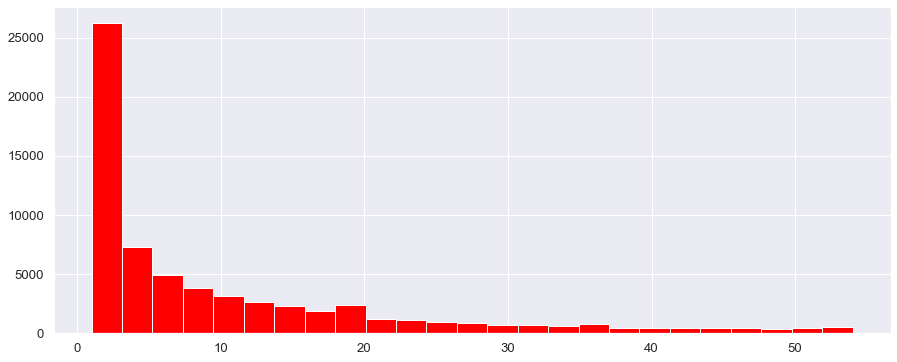

In [140]:
#Visualise the distribution of Numeric features follwoing data cleaning

df_numeric.CountValue.hist(figsize=(15,6), bins=25, color="red");

Poisson distribution

## Setting up X and y

In [141]:
MLData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65260 entries, 0 to 82250
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       65260 non-null  datetime64[ns]
 1   DirectionFrom  65260 non-null  object        
 2   DirectionTo    65260 non-null  object        
 3   CountType      65260 non-null  object        
 4   Hour           65260 non-null  int64         
 5   Minute         65260 non-null  int64         
 6   Day            65260 non-null  int64         
 7   DayOfWeek      65260 non-null  object        
 8   Rush_Hour      65260 non-null  object        
 9   CountValue     65260 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 5.5+ MB


In [142]:
X=MLData.iloc[:, :-1].values  # Features
y=MLData.iloc[:, -1]  # Labels

### One Hot Encoding the independent features

In order for the ML algorithm to be able to use the my features the categorical features will need to be converted binary using one hot encoding to ensure no mathematical relationship between the replacement numerical values for the categories. 

In addition, whilst my time features (Day, Hour, Minute) are already integer data types. In order to prevent the ML algorithm from assuming a false mathematical relationship between my time intervals, for example hour 7 is related to hour 8. The day, hour and minute features will also require one hot encoding in order to remove this false mathematical relationship. 

In [143]:
MLData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65260 entries, 0 to 82250
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       65260 non-null  datetime64[ns]
 1   DirectionFrom  65260 non-null  object        
 2   DirectionTo    65260 non-null  object        
 3   CountType      65260 non-null  object        
 4   Hour           65260 non-null  int64         
 5   Minute         65260 non-null  int64         
 6   Day            65260 non-null  int64         
 7   DayOfWeek      65260 non-null  object        
 8   Rush_Hour      65260 non-null  object        
 9   CountValue     65260 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 5.5+ MB


In [144]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False) # Want to return a boolean not an array
X = ohe.fit_transform(X[:,[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [145]:
X

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [146]:
X.shape

(65260, 339)

## Splitting into train and test sets

In [147]:
from sklearn.model_selection import train_test_split

# Split the data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Random Forest - Version 1

## Iteration 1

In [148]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500) 

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [149]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.1389825314128103

## Iteration 2

Here I increased the max depth to 200 as I did not specify it in iteration 1, the default is none

In [150]:
clf2=RandomForestClassifier(n_estimators=500, max_depth=200, n_jobs=1) 

clf2.fit(X_train,y_train)

y_pred=clf2.predict(X_test)

In [151]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.13645418326693226

## Iteration 3

Here I increased the max_depth of 100 and tried bootstrap = False

### bootstrap = False

In [152]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf3=RandomForestClassifier(n_estimators=500, max_depth=100, bootstrap=False)
clf3.fit(X_train,y_train)

y_pred=clf3.predict(X_test)

In [153]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.16334661354581673

### bootstrap = True

Here I used bootstrap = True

In [154]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf4=RandomForestClassifier(n_estimators=500, max_depth=100, bootstrap=True)
clf4.fit(X_train,y_train)

y_pred=clf4.predict(X_test)

In [155]:
metrics.accuracy_score(y_test, y_pred)

0.13660741648789457

A further 2 RF iterations were run using bootstrap True/False and 5,000 iterations. I have removed them due to the computational resources required often crashing the computer. However they also had an accuracy of 13% when successful.

# Data Preparation for Random Forest Version 2 + K-Neatest Neighbor (KNN)

The first attempts at the random forest (Version 1) performed extremely poorly with no iteration scoring higher than 16% accuracy. 

I suspect this may be for a number of reasons primarily,
1) I did not use a grid search to find the optimal features

2) The dataset may be too small once the outliers have been removed

3) The time series of 15 minute intervals does not allowed the model to accurately gather the totals per hour

4) My y label is an ordinal level of measurement and random forest is designed to deal with categorical data.

Therefore, there are a number of ways we can address these issues during data preparation which I have outlined below.

## Importing multiple traffic data sets

There are two traffic count datasets available from Dublin City Council 2020 for 2019, one for the month of November in the cordon and one for the month of May for the cordon + the quays. I am merging this data sets as they share the same column names and combined will give a representative view of the traffic in Dublin over time.

In [156]:
cordcountnov19 = pd.read_csv("cordon-count-november-2019.csv", low_memory=False)
quayscountmay19 = pd.read_csv("quays-count-may-2019.csv", low_memory=False)

In [157]:
cordcountnov19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151390 entries, 0 to 151389
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   RecordID       151390 non-null  int64 
 1   CountGroup     151390 non-null  object
 2   SiteNumber     151390 non-null  object
 3   Direction      29952 non-null   object
 4   Movement       151390 non-null  object
 5   ArmFrom        29952 non-null   object
 6   ArmTo          29952 non-null   object
 7   DirectionFrom  147838 non-null  object
 8   DirectionTo    147838 non-null  object
 9   Date           151390 non-null  object
 10  Time           151390 non-null  object
 11  CountType      151390 non-null  object
 12  CountValue     151390 non-null  int64 
 13  ArmCrossed     6143 non-null    object
 14  ArmLocation    6143 non-null    object
dtypes: int64(2), object(13)
memory usage: 17.3+ MB


In [158]:
cordcountnov19.describe()

,RecordID,CountValue
count,151390.000000,151390.000000
mean,431601.855109,18.371511
std,125579.948900,44.732526
min,266694.000000,0.000000
25%,312787.250000,0.000000
50%,379604.500000,1.000000
75%,559972.750000,11.000000
max,637839.000000,560.000000


In [159]:
quayscountmay19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475042 entries, 0 to 475041
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   RecordID       475042 non-null  int64 
 1   CountGroup     475042 non-null  object
 2   SiteNumber     475042 non-null  object
 3   Direction      409091 non-null  object
 4   Movement       475042 non-null  object
 5   ArmFrom        407939 non-null  object
 6   ArmTo          407939 non-null  object
 7   DirectionFrom  475042 non-null  object
 8   DirectionTo    475042 non-null  object
 9   Date           475042 non-null  object
 10  Time           475042 non-null  object
 11  CountType      475042 non-null  object
 12  CountValue     475042 non-null  object
 13  ArmCrossed     65663 non-null   object
 14  ArmLocation    56447 non-null   object
dtypes: int64(1), object(14)
memory usage: 54.4+ MB


## Cleaning the datasets

### Matching the datatypes for each column ID

Both datasets have the same column names. However, our EDA showed us that the Dtype for the 'CountValue' column is an object for the May traffic count file, versus an int for the November file. This will cause difficulties if I attempt to merge them. We can investigate the cause of this using unique.

In [160]:
quayscountmay19.CountValue.unique()

array(['0', '72', '92', '169', '176', '232', '240', '540', '382', '213',
       '203', '118', '103', '69', '63', '62', '53', '50', '52', '75',
       '91', '125', '114', '139', '181', '143', '132', '78', '58', '109',
       '74', '45', '65', '48', '54', '84', '100', '136', '123', '180',
       '182', '145', '122', '113', '68', '10', '5', '8', '11', '18', '27',
       '13', '34', '22', '23', '9', '4', '12', '7', '6', '14', '16', '42',
       '87', '60', '51', '29', '30', '15', '17', '46', '41', '24', '47',
       '36', '43', '38', '32', '2', '28', '40', '20', '3', '56', '61',
       '39', '33', '21', '35', '26', '57', '25', '37', '59', '44', '19',
       '83', '49', '31', '71', '79', '94', '81', '99', '134', '150',
       '221', '121', '111', '67', '64', '149', '177', '144', '142', '131',
       '70', '112', '96', '246', '254', '310', '281', '280', '220', '229',
       '154', '1', '55', '66', '140', '108', '102', '76', '97', '80',
       '137', '156', '328', '226', '93', '82', '106', '8

CountValue.unique() demonstrates that some of the traffic counts are over 1,000 and a special character in the form of a comma has been used to separate the values over 1,00. For example, '1,202', '1,200'. In order to be able to convert this column to an integer to allow merging, I must remove these special characters and change the Dtype to an int.

In [161]:
quayscountmay19["CountValue"] = quayscountmay19["CountValue"].str.replace(",","")
quayscountmay19["CountValue"] = quayscountmay19["CountValue"].astype(np.int64 )

In [162]:
quayscountmay19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475042 entries, 0 to 475041
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   RecordID       475042 non-null  int64 
 1   CountGroup     475042 non-null  object
 2   SiteNumber     475042 non-null  object
 3   Direction      409091 non-null  object
 4   Movement       475042 non-null  object
 5   ArmFrom        407939 non-null  object
 6   ArmTo          407939 non-null  object
 7   DirectionFrom  475042 non-null  object
 8   DirectionTo    475042 non-null  object
 9   Date           475042 non-null  object
 10  Time           475042 non-null  object
 11  CountType      475042 non-null  object
 12  CountValue     475042 non-null  int64 
 13  ArmCrossed     65663 non-null   object
 14  ArmLocation    56447 non-null   object
dtypes: int64(2), object(13)
memory usage: 54.4+ MB


In [163]:
quayscountmay19.describe()

,RecordID,CountValue
count,475042.000000,475042.000000
mean,280982.671951,10.774980
std,185674.040802,34.561618
min,1.000000,0.000000
25%,118761.250000,0.000000
50%,237521.500000,0.000000
75%,445424.750000,4.000000
max,636418.000000,1202.000000


In [164]:
funcs.calc_percent_missing(cordcountnov19.isnull().sum(), len(cordcountnov19))

The percentage of missing values is:
RecordID          0.00
CountGroup        0.00
SiteNumber        0.00
Direction        80.22
Movement          0.00
ArmFrom          80.22
ArmTo            80.22
DirectionFrom     2.35
DirectionTo       2.35
Date              0.00
Time              0.00
CountType         0.00
CountValue        0.00
ArmCrossed       95.94
ArmLocation      95.94
dtype: float64


In [165]:
funcs.calc_percent_missing(quayscountmay19.isnull().sum(), len(quayscountmay19))

The percentage of missing values is:
RecordID          0.00
CountGroup        0.00
SiteNumber        0.00
Direction        13.88
Movement          0.00
ArmFrom          14.13
ArmTo            14.13
DirectionFrom     0.00
DirectionTo       0.00
Date              0.00
Time              0.00
CountType         0.00
CountValue        0.00
ArmCrossed       86.18
ArmLocation      88.12
dtype: float64


### Dealing with missing data in the direction from and direction to columns

This time we need to deal with the missing data in each set before merging. As once the data sets are merged, the large increase in total number of observations will enlarge the number of missing variables as a %, In addition as my method of replacement is either to drop the columns or use the mode, merging the datasets will skew the mode in comparison to the datasets relative observations of each set. Therefore we need to drop or replace missing data before merging.

Here we replace the Direction From and To columns using the mode

In [166]:
print(mode(cordcountnov19['DirectionFrom']))
print(mode(cordcountnov19['DirectionTo']))

S
N


In [167]:
cordcountnov19["DirectionFrom"] = cordcountnov19["DirectionFrom"].fillna(mode(cordcountnov19['DirectionFrom']))
cordcountnov19["DirectionTo"] = cordcountnov19["DirectionTo"].fillna(mode(cordcountnov19['DirectionTo']))

In [168]:
cordcountnov19.isnull().sum()

RecordID              0
CountGroup            0
SiteNumber            0
Direction        121438
Movement              0
ArmFrom          121438
ArmTo            121438
DirectionFrom         0
DirectionTo           0
Date                  0
Time                  0
CountType             0
CountValue            0
ArmCrossed       145247
ArmLocation      145247
dtype: int64

In [169]:
quayscountmay19.isnull().sum()

RecordID              0
CountGroup            0
SiteNumber            0
Direction         65951
Movement              0
ArmFrom           67103
ArmTo             67103
DirectionFrom         0
DirectionTo           0
Date                  0
Time                  0
CountType             0
CountValue            0
ArmCrossed       409379
ArmLocation      418595
dtype: int64

No missing data is in the Direction To and From columns fr the May df, we shall deal with the other missing data further on by dropping those columns after we have merged the df's further on.

### Removing the sparse data

Now I need to remove the Spare data from the 'CountValue' feature which is caused by the sampling issue previously identified due to the large number of attributes in the 'CountType' feature.

In [170]:
cordcountnov19 = cordcountnov19[(cordcountnov19['CountValue'] > 0)]
quayscountmay19 = quayscountmay19[(quayscountmay19['CountValue'] > 0)]

In [171]:
cordcountnov19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82251 entries, 69139 to 151389
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RecordID       82251 non-null  int64 
 1   CountGroup     82251 non-null  object
 2   SiteNumber     82251 non-null  object
 3   Direction      12556 non-null  object
 4   Movement       82251 non-null  object
 5   ArmFrom        12556 non-null  object
 6   ArmTo          12556 non-null  object
 7   DirectionFrom  82251 non-null  object
 8   DirectionTo    82251 non-null  object
 9   Date           82251 non-null  object
 10  Time           82251 non-null  object
 11  CountType      82251 non-null  object
 12  CountValue     82251 non-null  int64 
 13  ArmCrossed     3129 non-null   object
 14  ArmLocation    3129 non-null   object
dtypes: int64(2), object(13)
memory usage: 10.0+ MB


In [172]:
quayscountmay19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182650 entries, 292392 to 475041
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   RecordID       182650 non-null  int64 
 1   CountGroup     182650 non-null  object
 2   SiteNumber     182650 non-null  object
 3   Direction      138691 non-null  object
 4   Movement       182650 non-null  object
 5   ArmFrom        137986 non-null  object
 6   ArmTo          137986 non-null  object
 7   DirectionFrom  182650 non-null  object
 8   DirectionTo    182650 non-null  object
 9   Date           182650 non-null  object
 10  Time           182650 non-null  object
 11  CountType      182650 non-null  object
 12  CountValue     182650 non-null  int64 
 13  ArmCrossed     43927 non-null   object
 14  ArmLocation    37852 non-null   object
dtypes: int64(2), object(13)
memory usage: 22.3+ MB


## Merging the traffic datasets

Next we will merge these datasets, as I want to merge all the column of the same names. I have specified to merge by the "outer" merge type.

In [173]:
dataset = pd.merge(cordcountnov19, quayscountmay19, how="outer")

In [174]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264901 entries, 0 to 264900
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   RecordID       264901 non-null  int64 
 1   CountGroup     264901 non-null  object
 2   SiteNumber     264901 non-null  object
 3   Direction      151247 non-null  object
 4   Movement       264901 non-null  object
 5   ArmFrom        150542 non-null  object
 6   ArmTo          150542 non-null  object
 7   DirectionFrom  264901 non-null  object
 8   DirectionTo    264901 non-null  object
 9   Date           264901 non-null  object
 10  Time           264901 non-null  object
 11  CountType      264901 non-null  object
 12  CountValue     264901 non-null  int64 
 13  ArmCrossed     47056 non-null   object
 14  ArmLocation    40981 non-null   object
dtypes: int64(2), object(13)
memory usage: 32.3+ MB


In [175]:
#Adding the number of cordcount to quaycount observations to determine if total matches the merged dataset
82251 + 182650 

264901

The total number of observations of the merged dataset matches the combined observations of the two datasets used to create it. This demonstrates all the data was merged successfully

## Manipulating the merged dataset

### Setting the new date time index

In [176]:
dataset = funcs.merge_date_time(dataset)
dataset = dataset.reset_index()

In [177]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264901 entries, 0 to 264900
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DateTime       264901 non-null  datetime64[ns]
 1   RecordID       264901 non-null  int64         
 2   CountGroup     264901 non-null  object        
 3   SiteNumber     264901 non-null  object        
 4   Direction      151247 non-null  object        
 5   Movement       264901 non-null  object        
 6   ArmFrom        150542 non-null  object        
 7   ArmTo          150542 non-null  object        
 8   DirectionFrom  264901 non-null  object        
 9   DirectionTo    264901 non-null  object        
 10  Date           264901 non-null  object        
 11  Time           264901 non-null  object        
 12  CountType      264901 non-null  object        
 13  CountValue     264901 non-null  int64         
 14  ArmCrossed     47056 non-null   object        
 15  

### Merging similar traffic types into a single category

Here I merge all the similar vehicle types into a single aggregated category. In addition, the 'quayscountmay19' dataset had an additional 'total' attribute in the 'CountType' feature. During EDA, this attribute was determined to be an additional pedestrian total ascertained by viewing the 'CountGroup' attribute column which stated the counted group was Pedestrian (PED).

In [178]:
dataset.CountType.unique()

array(['CAR', 'VehTotal', 'PCU', 'HGV 3X', 'HGV 2X', 'LGV', 'P/C',
       'HGV 4X', 'HGV 5+X', 'M/C', 'DBUS', 'OBUS', 'TAXI', 'TAXI OCC 3',
       'TAXI OCC 4', 'TAXI OCC 2', 'TAXI OCC 1', 'TAXI OCC 6',
       'TAXI OCC 5', 'TAXI OCC 8', 'TAXI OCC 7', 'CAR OCC 1', 'CAR OCC 2',
       'CAR OCC 3', 'CAR OCC 4', 'CAR OCC 5', 'CAR OCC 6', 'CAR OCC 7',
       'PED', 'ELDERLY', 'CHILD', 'PEDTOTAL', 'ADULT', 'TOTAL'],
      dtype=object)

In [179]:
dataset = funcs.merge_similar_counttypes(dataset)

In [180]:
dataset.CountType.unique()

array(['CAR', 'VehTotal', 'OTHER', 'HGV', 'BUS', 'TAXI', 'PED',
       'PEDTOTAL'], dtype=object)

## Feature Engineering 

### Creating an hour, day, month and day of the week feature

In [181]:
dataset['Hour'] = dataset['DateTime'].dt.hour
dataset['Day'] = dataset['DateTime'].dt.day
dataset['Month'] = dataset['DateTime'].dt.month
dataset['DayOfWeek'] = dataset['DateTime'].dt.day_name()

### Creating a rush hour feature

The below function maps the hour of the day in the 'Hour' feature and assigns it to either
Morning Rush hour = 7 to 9 am
Not Rush Hour = 10 am to 3 pm
Evening Rush Hour = 4 pm to 6 pm

My dataset does not have any hours outside of 7 am to 6 pm so no exceptions are required.


Rush Hour times were sourced as per Dublin City Council (2022): https://www.dublin.info/getting-around/#:~:text=Dublin%20By%20Car&text=Generally%20speaking%2C%20rush%20hour%20is,19%3A00%20Monday%20to%20Friday.

In [182]:
dataset = funcs.create_rush_hour(dataset)

In [183]:
dataset.head()

,DateTime,RecordID,CountGroup,SiteNumber,Direction,Movement,ArmFrom,ArmTo,DirectionFrom,DirectionTo,...,Time,CountType,CountValue,ArmCrossed,ArmLocation,Hour,Day,Month,DayOfWeek,Rush_Hour
0,2019-11-20 07:15:00,373049,JTC,3424-IRE-Nov2019-011-JTC,A to D - Dolphin's Barn to Parnell Road,1,A,D,N,E,...,07:15:00,CAR,2,NaN,NaN,7,20,11,Wednesday,Rush_Hour
1,2019-11-20 07:15:00,373050,JTC,3424-IRE-Nov2019-011-JTC,A to D - Dolphin's Barn to Parnell Road,1,A,D,N,E,...,07:15:00,VehTotal,3,NaN,NaN,7,20,11,Wednesday,Rush_Hour
2,2019-11-20 07:15:00,373051,JTC,3424-IRE-Nov2019-011-JTC,A to D - Dolphin's Barn to Parnell Road,1,A,D,N,E,...,07:15:00,OTHER,2,NaN,NaN,7,20,11,Wednesday,Rush_Hour
3,2019-11-20 07:30:00,373052,JTC,3424-IRE-Nov2019-011-JTC,A to D - Dolphin's Barn to Parnell Road,1,A,D,N,E,...,07:30:00,CAR,4,NaN,NaN,7,20,11,Wednesday,Rush_Hour
4,2019-11-20 07:30:00,373053,JTC,3424-IRE-Nov2019-011-JTC,A to D - Dolphin's Barn to Parnell Road,1,A,D,N,E,...,07:30:00,VehTotal,4,NaN,NaN,7,20,11,Wednesday,Rush_Hour


### Moving the dependent variable to the end

In [184]:
target = dataset.pop('CountValue')
        # insert column using insert(position,column_name, first_column) function

In [185]:
dataset.insert(len(dataset.columns), 'CountValue', target)

In [186]:
dataset.head(2)

# Viewing the dataset after completion of feature engineering and shaping.

,DateTime,RecordID,CountGroup,SiteNumber,Direction,Movement,ArmFrom,ArmTo,DirectionFrom,DirectionTo,...,Time,CountType,ArmCrossed,ArmLocation,Hour,Day,Month,DayOfWeek,Rush_Hour,CountValue
0,2019-11-20 07:15:00,373049,JTC,3424-IRE-Nov2019-011-JTC,A to D - Dolphin's Barn to Parnell Road,1,A,D,N,E,...,07:15:00,CAR,NaN,NaN,7,20,11,Wednesday,Rush_Hour,2
1,2019-11-20 07:15:00,373050,JTC,3424-IRE-Nov2019-011-JTC,A to D - Dolphin's Barn to Parnell Road,1,A,D,N,E,...,07:15:00,VehTotal,NaN,NaN,7,20,11,Wednesday,Rush_Hour,3


In [187]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264901 entries, 0 to 264900
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DateTime       264901 non-null  datetime64[ns]
 1   RecordID       264901 non-null  int64         
 2   CountGroup     264901 non-null  object        
 3   SiteNumber     264901 non-null  object        
 4   Direction      151247 non-null  object        
 5   Movement       264901 non-null  object        
 6   ArmFrom        150542 non-null  object        
 7   ArmTo          150542 non-null  object        
 8   DirectionFrom  264901 non-null  object        
 9   DirectionTo    264901 non-null  object        
 10  Date           264901 non-null  object        
 11  Time           264901 non-null  object        
 12  CountType      264901 non-null  object        
 13  ArmCrossed     47056 non-null   object        
 14  ArmLocation    40981 non-null   object        
 15  

### Dropping features with non useful attributes

Here I drop the features whose attributes will not be useful for predicting traffic volumes or have been replaced by an engineered feature that is more useful.

In addition, I have dealt with the remaining missing data in the "ArmFrom", "ArmTo", "ArmCrossed", "ArmLocation" and "Direction" columns by dropping these. As the over 80-90% of the data was identified to be missing in both dataframes earlier on.

In [188]:
dataset = dataset.drop(["RecordID", "CountGroup", "SiteNumber", "Movement",
                        "ArmFrom", "ArmTo", "ArmCrossed", "ArmLocation",
                        "Date", "Time", "Direction"],axis=1)

In [189]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264901 entries, 0 to 264900
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DateTime       264901 non-null  datetime64[ns]
 1   DirectionFrom  264901 non-null  object        
 2   DirectionTo    264901 non-null  object        
 3   CountType      264901 non-null  object        
 4   Hour           264901 non-null  int64         
 5   Day            264901 non-null  int64         
 6   Month          264901 non-null  int64         
 7   DayOfWeek      264901 non-null  object        
 8   Rush_Hour      264901 non-null  object        
 9   CountValue     264901 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 20.2+ MB


## Preparation of the dependent variable for random forest

As random forest works on classification and pandas datetime can be problematic in the manner in which it removes or aggregates data, that being such as deleting certain data types or their attributes. I am opted to convert my 'CountValue' for traffic counts to heavy or low traffic. To classify traffic as heavy or normal, we first need to determine what is the normal traffic range observed in 15 minute intervals.

To do this we first need to remove the outliers in the dataset.

### Removing outliers

In [190]:
dataset.describe()

,Hour,Day,Month,CountValue
count,264901.000000,264901.000000,264901.000000,264901.000000
mean,12.495566,13.868275,6.862983,29.821824
std,3.477341,3.923722,2.776188,52.890386
min,7.000000,5.000000,5.000000,1.000000
25%,9.000000,14.000000,5.000000,2.000000
50%,13.000000,14.000000,5.000000,8.000000
75%,16.000000,16.000000,11.000000,30.000000
max,18.000000,21.000000,11.000000,1202.000000


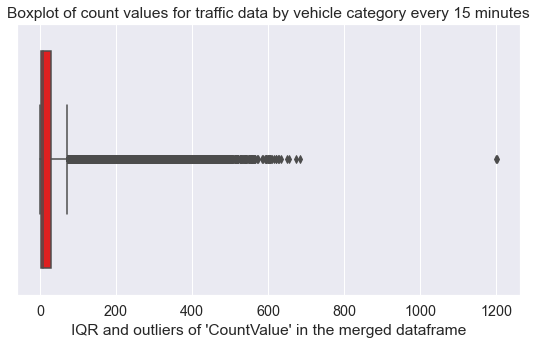

In [191]:
plt.figure(figsize=(9, 5));
sns.set(font_scale = 1.3);
sns.boxplot(x=dataset["CountValue"], color="red");
plt.title("Boxplot of count values for traffic data by vehicle category every 15 minutes");
plt.xlabel("IQR and outliers of 'CountValue' in the merged dataframe");

Next we show the boundaries for Countvalue in the merged dataset

In [192]:
funcs.show_boundaries(dataset)

The first quartile (Q1) is 2.0
The third quartile (Q3) is 30.0
The upper boundary for outliers is is 72.0
The lower boundary for outliers is is 1


At present the data shows that a large number of observations would be removed as "outliers" based on the IQR if we used the standard formula of q1 - IQR * 1.5 and q3 + IQR * 1.5,

This is due to the fact that these observations are based on the following:

1) they are observations for 15 minute intervals

2) They are observations per Vehicle Category specified in the 'CountType' column 

Therefore, in order to get a true picture of traffic per 15 min interval we must look at the sum of all the traffic in the 'CountType' vehicle categories every 15 minutes. We can do this using the totals provided by 'VehTotal' and 'PedTotal' in the CountType.



In [193]:
dataset.CountType.unique()

array(['CAR', 'VehTotal', 'OTHER', 'HGV', 'BUS', 'TAXI', 'PED',
       'PEDTOTAL'], dtype=object)

In [194]:
merged_totals_df = dataset.loc[(dataset['CountType'] == "PEDTOTAL")| 
                                      (dataset['CountType'] == "VehTotal")]

In the above we have created a new DF with only the traffic totals for each 15 minute interval observed in the merged dataset. We can now observe the "true range" of traffic counts during each 15 minute interval

In [195]:
merged_totals_df.describe()

,Hour,Day,Month,CountValue
count,51766.000000,51766.000000,51766.000000,51766.000000
mean,12.553761,14.751941,6.077812,54.015918
std,3.461708,2.985258,2.303323,72.084553
min,7.000000,5.000000,5.000000,1.000000
25%,10.000000,14.000000,5.000000,7.000000
50%,13.000000,16.000000,5.000000,24.000000
75%,16.000000,16.000000,5.000000,78.000000
max,18.000000,21.000000,11.000000,1202.000000


Next we show the boundaries for Countvalue in the merged_totals_df

In [196]:
funcs.show_boundaries(merged_totals_df)

The first quartile (Q1) is 7.0
The third quartile (Q3) is 78.0
The upper boundary for outliers is is 184.5
The lower boundary for outliers is is 1


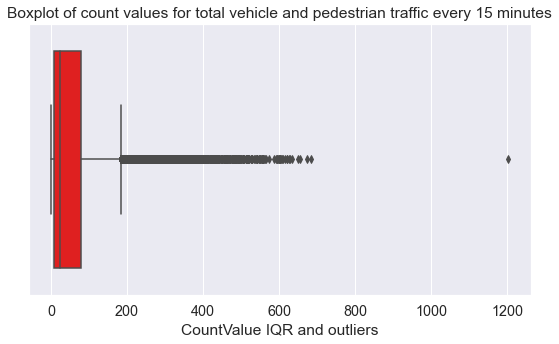

In [197]:
plt.figure(figsize=(9, 5));
sns.set(font_scale = 1.3);
sns.boxplot(x=merged_totals_df["CountValue"], color="red");
plt.title("Boxplot of count values for total vehicle and pedestrian traffic every 15 minutes");
plt.xlabel("CountValue IQR and outliers");

The boxplot demonstrates in tandum with .describe() shows that the 3rd quartile (75%) of our merged_totals_df observations are at or below a 'CountValue' of 78. However, the maximum observed value is 1,202 with a large range of numebrs between the 75% percentile and the maximum. 

In order to ensure these outliers do not bias our machine learning model, we need to remove them using the following formula for the upper and lower limits of the data:

lower_limit = if q1 - (IQR * 1.5) > 1, lower limit >= lower limit. if lower limit <1 then lower limit >= 1 as below 1 is outside the domain of the interquartile range. As you cannot have a traffic count of "Zero" or a "negative"

upper_limit = q3 + (IQR * 1.5)

In [198]:
Q3, Q1 = np.percentile(merged_totals_df.CountValue, [75, 25])
IQR_md = Q3 - Q1

upper_limit_md = Q3 + (IQR_md * 1.5)
lower_limit_md = Q1 - (IQR_md * 1.5)

print(Q3, Q1, IQR_md, upper_limit_md, lower_limit_md)

78.0 7.0 71.0 184.5 -99.5


In [199]:
if lower_limit_md < 1:
    lower_limit_md = 1
else:
    lower_limit_md = Q3 + (IQR_md * 1.5)

In [200]:
print(lower_limit_md)

1


In [201]:
merged_totals_df = merged_totals_df[(merged_totals_df['CountValue'] >= lower_limit_md) &
                                   (merged_totals_df['CountValue'] <= upper_limit_md)]

In [202]:
merged_totals_df.CountValue.unique()

array([  3,   4,   2,   5,   7,   6,  32,  11,  16,  10,   9,   8,  14,
        12,  19,  13,  22,  20,  21,  27,  17,  18,  23,  15,  97, 111,
       129, 131, 148, 147, 149,  99, 106, 124,  88,  83,  85,  82,  77,
        74,  95,  89,  81,  61,  96,  72,  78,  79,  62,  54,  73, 103,
        86,  75,  48,  80,  51,  50,  68,  71,  70,  93,  67,  65,  64,
        60,  76,  98,  92,  87, 109,  84, 100, 105,  94, 104, 120, 101,
       128, 145, 130, 143, 119, 108, 178, 172, 142, 177, 139, 138, 146,
       141, 152, 125, 135, 122, 112, 114, 126, 110, 134, 136, 137, 132,
       115, 140, 169, 180, 168, 163, 156, 133, 121, 150, 154, 159, 184,
       175, 166, 160, 183, 107, 113,  90,  91, 123, 158, 144, 155, 170,
       165, 174, 118, 102, 117,  55,  59,  58, 176,  25,  24,  33,  29,
        28,  31,  40,  26,  38,  35,  30,  37,  36,  45, 167, 153, 181,
       157, 173, 162,  52,  49,  56,  69,  63, 151,  46,  43,  44,  53,
        57,  47, 164, 116,  34,  39,  41,  42, 127,  66,   1, 17

The outliers are now removed as no value below Zero or above or equal to 184 is now in the dataset. This leaves us with 51766 observations left in the total columns.

In [203]:
merged_totals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48696 entries, 1 to 247203
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       48696 non-null  datetime64[ns]
 1   DirectionFrom  48696 non-null  object        
 2   DirectionTo    48696 non-null  object        
 3   CountType      48696 non-null  object        
 4   Hour           48696 non-null  int64         
 5   Day            48696 non-null  int64         
 6   Month          48696 non-null  int64         
 7   DayOfWeek      48696 non-null  object        
 8   Rush_Hour      48696 non-null  object        
 9   CountValue     48696 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 4.1+ MB


## Converting the dependent variable 'CountType' to categorical

Here I shall convert the dependent variable into two categories, "Normal Traffic" and "Heavy Traffic", in order to do this I first need to define parameters for what distinguishes Heavy Traffic from normal traffic. To do this I first need to examine the mean, median and distribution of the traffics CountValue.

### Mean and median

In [204]:
merged_totals_df.mean()

C:\Users\shaun\AppData\Local\Temp/ipykernel_2580/1013143581.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  merged_totals_df.mean()
C:\Users\shaun\AppData\Local\Temp/ipykernel_2580/1013143581.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_totals_df.mean()


Hour          12.549162
Day           14.870051
Month          6.022548
CountValue    40.649499
dtype: float64

In [205]:
merged_totals_df.median()

C:\Users\shaun\AppData\Local\Temp/ipykernel_2580/2495373273.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  merged_totals_df.median()
C:\Users\shaun\AppData\Local\Temp/ipykernel_2580/2495373273.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_totals_df.median()


Hour          13.0
Day           16.0
Month          5.0
CountValue    21.0
dtype: float64

### Distribution of the new dataset

C:\Users\shaun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-20.0, 200.0)

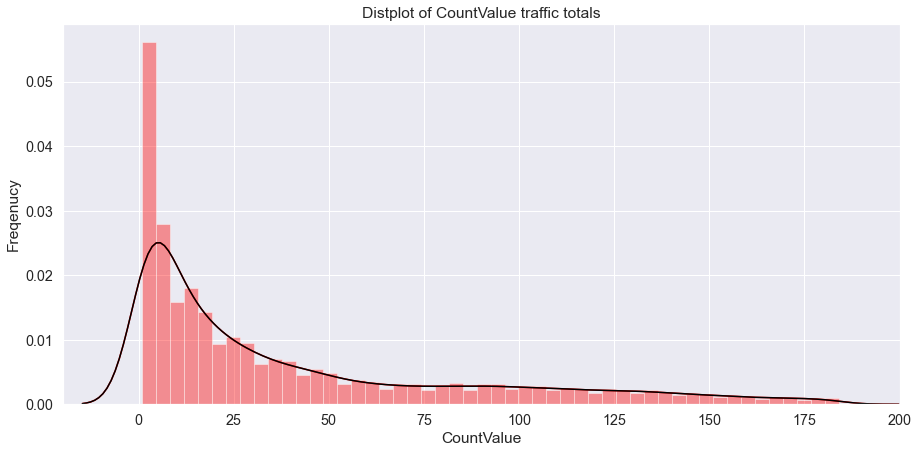

In [206]:
plt.figure(figsize=(15, 7));
sns.set(font_scale = 1.3);
sns.distplot(merged_totals_df.CountValue, color = "red");
sns.kdeplot(merged_totals_df.CountValue, color="black")
plt.title("Distplot of CountValue traffic totals");
plt.xlabel("CountValue");
plt.ylabel("Freqenucy");
plt.xlim(-20,200)

The distlot shows that the data is a poisson distribution, therefore in order to categorise traffic data based on Counts, I will need to use the "median". The distribution can be confirmed using a QQ plot and a KStest.

C:\Users\shaun\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


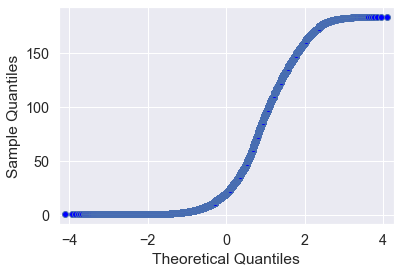

In [207]:
my_data = merged_totals_df['CountValue']
sm.qqplot(my_data)
pylab.show()

# using no reference line

The QQ plot shows a sigmoid shape. We can confirm if the distribution is a Poisson distribution (i.e. non-normal) using the KS test/statistic.

In [208]:
from scipy.stats import kstest, norm
ks_statistic, p_value = kstest(my_data, 'norm')
print(ks_statistic, p_value)

0.8968531208857291 0.0


The p value = 0 so deviation is significant. The distribution is not a normal distribution, it is a Poisson distribution.

### Creating the heavy and normal traffic labels

In [209]:
merged_totals_df['CountValue_cat'] = np.where(merged_totals_df['CountValue'] <= 21, "Normal_Traffic", 
                                             np.where(merged_totals_df['CountValue'] > 21, "Heavy_Traffic",""))

The dataframe is now split by Traffic volume as a categorical. Now all I need to do is drop the old CountValue columns.

In [210]:
merged_totals_df = merged_totals_df.drop(["CountValue"],axis=1)

In [211]:
merged_totals_df.head(10)

,DateTime,DirectionFrom,DirectionTo,CountType,Hour,Day,Month,DayOfWeek,Rush_Hour,CountValue_cat
1,2019-11-20 07:15:00,N,E,VehTotal,7,20,11,Wednesday,Rush_Hour,Normal_Traffic
4,2019-11-20 07:30:00,N,E,VehTotal,7,20,11,Wednesday,Rush_Hour,Normal_Traffic
6,2019-11-20 07:45:00,N,E,VehTotal,7,20,11,Wednesday,Rush_Hour,Normal_Traffic
8,2019-11-20 08:00:00,N,E,VehTotal,8,20,11,Wednesday,Rush_Hour,Normal_Traffic
10,2019-11-20 08:15:00,N,E,VehTotal,8,20,11,Wednesday,Rush_Hour,Normal_Traffic
12,2019-11-20 08:30:00,N,E,VehTotal,8,20,11,Wednesday,Rush_Hour,Normal_Traffic
15,2019-11-20 09:15:00,N,E,VehTotal,9,20,11,Wednesday,Rush_Hour,Normal_Traffic
18,2019-11-20 09:30:00,N,E,VehTotal,9,20,11,Wednesday,Rush_Hour,Normal_Traffic
20,2019-11-20 09:45:00,N,E,VehTotal,9,20,11,Wednesday,Rush_Hour,Normal_Traffic
22,2019-11-20 10:00:00,N,E,VehTotal,10,20,11,Wednesday,Not_Rush_Hour,Normal_Traffic


## Setting up X and Y

In [212]:
merged_totals_df = merged_totals_df.drop(["DateTime"],axis=1)

In [213]:
merged_totals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48696 entries, 1 to 247203
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DirectionFrom   48696 non-null  object
 1   DirectionTo     48696 non-null  object
 2   CountType       48696 non-null  object
 3   Hour            48696 non-null  int64 
 4   Day             48696 non-null  int64 
 5   Month           48696 non-null  int64 
 6   DayOfWeek       48696 non-null  object
 7   Rush_Hour       48696 non-null  object
 8   CountValue_cat  48696 non-null  object
dtypes: int64(3), object(6)
memory usage: 4.7+ MB


In [214]:
X=merged_totals_df.iloc[:, :-1].values  # Features
y=merged_totals_df.iloc[:, -1]  # Labels

## One-hot encoding the independent features

In [215]:
merged_totals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48696 entries, 1 to 247203
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DirectionFrom   48696 non-null  object
 1   DirectionTo     48696 non-null  object
 2   CountType       48696 non-null  object
 3   Hour            48696 non-null  int64 
 4   Day             48696 non-null  int64 
 5   Month           48696 non-null  int64 
 6   DayOfWeek       48696 non-null  object
 7   Rush_Hour       48696 non-null  object
 8   CountValue_cat  48696 non-null  object
dtypes: int64(3), object(6)
memory usage: 4.7+ MB


In order for the ML algorithm to be able to use the my features the categorical features will need to be converted binary using one hot encoding to ensure no mathematical relationship between the replacement numerical values for the categories. 

In addition, whilst my time features (Day, Hour, Minute) are already integer data types. In order to prevent the ML algorithm from assuming a false mathematical relationship between my time intervals, for example hour 7 is related to hour 8. The day, hour and minute features will also require one hot encoding in order to remove this false mathematical relationship. 

In [216]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
X = ohe.fit_transform(X[:, 1:9])

In [217]:
ohe.get_feature_names().shape

(37,)

In [218]:
X

array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [219]:
X.shape

(48696, 37)

## Label encoding the dependent label

Here I encode the new dependent categorical label 'CountValue_cat'

In [220]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [221]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [222]:
y.shape

(48696,)

# Splitting into train and test sets

In [223]:
from sklearn.model_selection import train_test_split

# Split the data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Random Forest - Version 2

In [224]:
RFV2=RandomForestClassifier(n_estimators=500)

RFV2.fit(X_train,y_train)

y_pred=RFV2.predict(X_test)

In [225]:
metrics.accuracy_score(y_test, y_pred)

0.6211498973305954

Random forest version 2 has already shown a significant improvement versus Version 1 which scored accuracy of 0.136, however I can still optimise the RF model using Grid Search and looking at feature importance

## Finding Important Features of RF-V2 using Scikit-learn

In [226]:
ohe.get_feature_names()

array(['x0_E', 'x0_N', 'x0_NE', 'x0_NW', 'x0_S', 'x0_SE', 'x0_SW', 'x0_W',
       'x1_PEDTOTAL', 'x1_VehTotal', 'x2_7', 'x2_8', 'x2_9', 'x2_10',
       'x2_11', 'x2_12', 'x2_13', 'x2_14', 'x2_15', 'x2_16', 'x2_17',
       'x2_18', 'x3_5', 'x3_6', 'x3_12', 'x3_13', 'x3_14', 'x3_16',
       'x3_20', 'x3_21', 'x4_5', 'x4_11', 'x5_Thursday', 'x5_Tuesday',
       'x5_Wednesday', 'x6_Not_Rush_Hour', 'x6_Rush_Hour'], dtype=object)

In [227]:
sorted_idx = RFV2.feature_importances_.argsort()

In [228]:
merged_totals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48696 entries, 1 to 247203
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DirectionFrom   48696 non-null  object
 1   DirectionTo     48696 non-null  object
 2   CountType       48696 non-null  object
 3   Hour            48696 non-null  int64 
 4   Day             48696 non-null  int64 
 5   Month           48696 non-null  int64 
 6   DayOfWeek       48696 non-null  object
 7   Rush_Hour       48696 non-null  object
 8   CountValue_cat  48696 non-null  object
dtypes: int64(3), object(6)
memory usage: 4.7+ MB


In [229]:
old = ['x0_','x1_', 'x2_','x3_', 'x4_', 'x5_','x6_']
new = ['Directions From ', 'Direction To ', 'Count Type ', 'Hour ', 'Day ',
       'Month ', 'Day of the Week ', 'Rush Hour ', 'Traffic volume ']
colNames = list(ohe.get_feature_names())
newCols = []
for o in old:#range(6):
    for i in range(6):
        newCols.append(colNames[i].replace(colNames[i], new[i] + colNames[i][2:], 1))

Due to the large number of features, I opted to filter out any feature whose importance was below 0.04

Text(0.5, 0, 'Feature Importance')

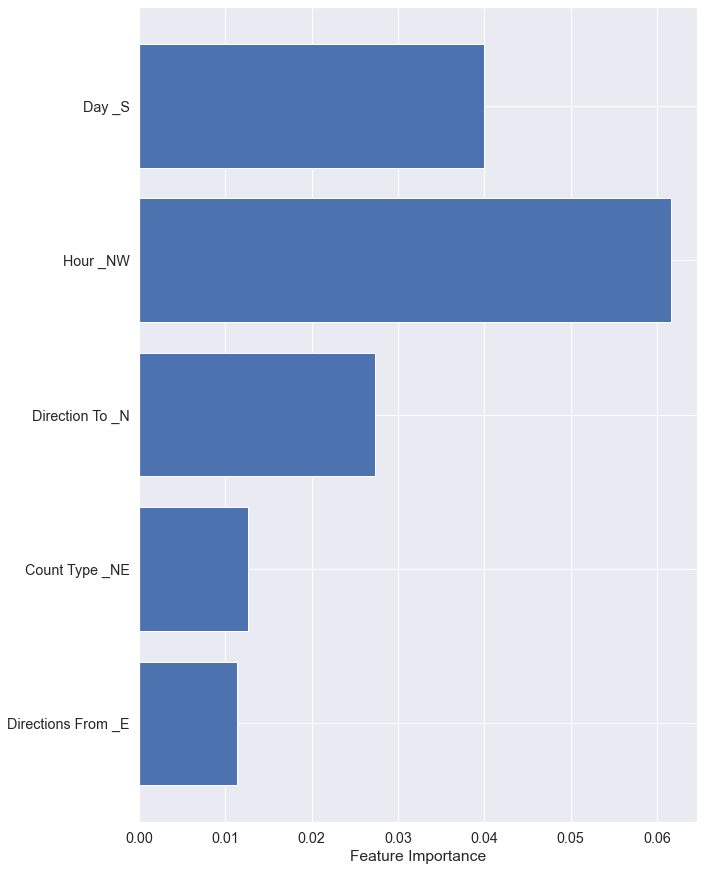

In [230]:
cutOff = 0.04
plt.figure(figsize=(10,15))
plt.barh(np.array(newCols)[sorted_idx][RFV2.feature_importances_ > cutOff], 
         RFV2.feature_importances_[sorted_idx][RFV2.feature_importances_ > cutOff])
plt.xlabel("Feature Importance")

## RF 2 - Accuracy

In [231]:
from sklearn.metrics import classification_report

In [232]:
print(classification_report(y_test, y_pred, target_names=merged_totals_df.CountValue_cat.unique()))

                precision    recall  f1-score   support

Normal_Traffic       0.64      0.51      0.57      4785
 Heavy_Traffic       0.61      0.73      0.66      4955

      accuracy                           0.62      9740
     macro avg       0.63      0.62      0.62      9740
  weighted avg       0.63      0.62      0.62      9740



              precision    recall  f1-score   support

           0       0.64      0.51      0.57      4785
           1       0.61      0.73      0.66      4955

    accuracy                           0.62      9740
   macro avg       0.63      0.62      0.62      9740
weighted avg       0.63      0.62      0.62      9740



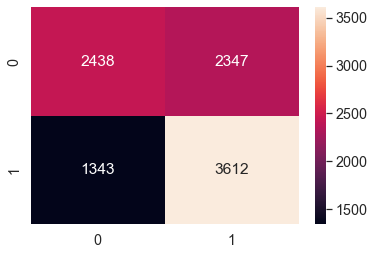

In [233]:
from sklearn.metrics import confusion_matrix

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True, fmt ='g')

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [234]:
# Random Forest Version 2 Model 1 results
y_pred = RFV2.predict(X_train)
print('Train score {} %'.format(metrics.accuracy_score(y_train, y_pred)))

y_pred = RFV2.predict(X_test)
print('Test score {} %'.format(metrics.accuracy_score(y_test, y_pred)))

Train score 0.6405688469041996 %
Test score 0.6211498973305954 %


As the train and test scores are within 2% I can say the model is not under or over fitted.

# Random Forest Version 3 - Using optimal parameters found with GridSearch

In [235]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=42)

param_grid = {'bootstrap': [True, False],
    'n_estimators': [200, 800, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 50, 100],
    'criterion': ['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}


In [236]:
# Random Forest Version 2 Model 2 best params results
y_pred = CV_rfc.predict(X_train)
print('Train score {} %'.format(metrics.accuracy_score(y_train, y_pred)))


y_pred = CV_rfc.predict(X_test)
print('Test score {} %'.format(metrics.accuracy_score(y_test, y_pred)))

Train score 0.6344850600677687 %
Test score 0.6228952772073922 %


Using Gridsearch to get the best parameters made little difference versus RF Version 2. Lets take a look at the F score.

In addition, as the train and test scores are within 1% I can say the model is not under or over fitted.

## Confusion matrix and F score from RF-V3

              precision    recall  f1-score   support

           0       0.67      0.47      0.55      4785
           1       0.60      0.77      0.68      4955

    accuracy                           0.62      9740
   macro avg       0.63      0.62      0.61      9740
weighted avg       0.63      0.62      0.61      9740



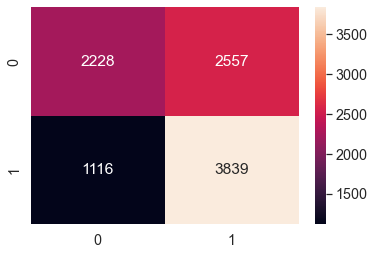

In [237]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True, fmt ='g')

print(classification_report(y_test, y_pred))

# K-Nearest Neighbor (KNN)

As the data preparation from Random Forest Versions 2 + 3 worked better with that classification algorithm, for comparison purposes that dataset will also be used for KNN, another classification algorithm.

Importing KNN and setting the neighbors range

In [238]:
from sklearn.neighbors import KNeighborsClassifier

In [239]:
neighbors = np.arange(1, 21)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix

Enumerating over all the 20 neighbor values and predicting both on training and testing data. Then we store, the accuracy in the X_train and y_train numpy arrays.

In [240]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(X_train, y_train)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)      # Save the score value in the train_accuracy array

Plotting the training and testing accuracy using matplotlib, with accuracy vs. varying number of neighbors graph. This allows us to visualise the best k value at which the KNN model performs the best.

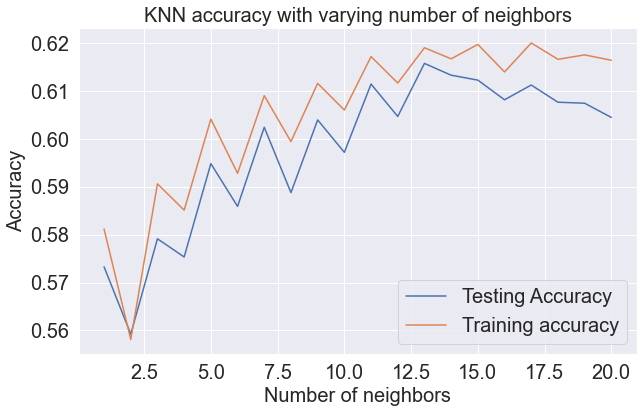

In [241]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# one neighbour is at 100% accuracy, this is called "over fitting". The plot shows 3 or 4 neighbours are the best to train, after this
# its an under fitting or over fitted model

It is clear from the above graph when n_neighbors = 13, both the train and test models perform best. Therefore I shall use n_neighbors=13 and retrain the model.

In [242]:
# Declare and initialise an object 'KNeighborsClassifier' with 13 neighbors
knn = KNeighborsClassifier(n_neighbors = 13)

# Fitting the model
knn.fit(X_train, y_train)

# Computing accuracy on the training set
train_accuracy = knn.score(X_train, y_train)

# Computing accuracy on the test set
test_accuracy = knn.score(X_test, y_test)

## KNN Accuracy

In [243]:
#Display training accuracy
print(train_accuracy)

# Displaying the test accuracy
print(test_accuracy)

0.6190830680768046
0.6158110882956879


We obtain the model accuracy to classify 61.58% of the testing data correctly. Next I built a confusion matrix 

In [244]:
# import library for confusion matrix
from sklearn.metrics import confusion_matrix

# Predict the results by calling a method 'predict()'
prediction = knn.predict(X_train)

# Display the confusion matrix
confusion_matrix(y_train, prediction)

array([[10220,  8989],
       [ 5850, 13897]], dtype=int64)

(array([0, 1]), [Text(0, 0, '0'), Text(0, 1, '1')])

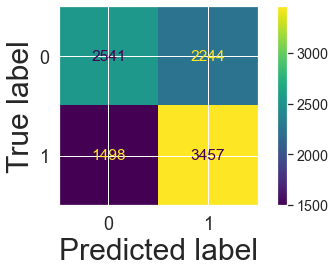

In [245]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)
plt.ylabel('True label',fontsize = 30)
plt.xlabel('Predicted label',fontsize = 30)
plt.tight_layout()
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

Overall this demonstrates that KNN and RF Versions 2 & 3 performed almost identically with 62% accuracy and had no issues with over or under fitting. However, all three models were a significant improvement versus RF Version 1. This was primarily down to the changes in how the data was prepared for machine learning. The second data preparation was more optimal for how classification algorithms recognise relationships.

While an improvement on RF-V1, the model performances were still poor even after the second iteration of data preparation. However, performance could potentially be further improved by adding new features, and removing those that were not identified as important using the feature importance.